In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import line_profiler

import datetime

from io import StringIO
from pandas.api.types import CategoricalDtype

import pandas._testing as tm

## returns df from string data
def g(data):
    return pd.read_csv(StringIO(data))

In [148]:
b.iloc[:, 1] += a.iloc[:, 0]
b

,P1[kW],P2[kW],Pn[kW]
0,2,2,2
1,3,3,3
2,3,3,3
3,4,12,4
4,2,10,2
5,2,2,2


In [265]:
load = [0,0,0,0,0,0,0]
data = pd.DataFrame(load)
for i in range(1, 10):
    data[i] = data[0]
data

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [266]:
overlay = pd.DataFrame([0,0,0,0,6,6,0])
overlay

,0
0,0
1,0
2,0
3,0
4,6
5,6
6,0


In [268]:
cols=[1,2,4,5,7,8]
data[cols] = data.iloc[:,cols] + overlay.iloc[:].values
data

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,6,6,0,6,6,0,6,6,0
5,0,6,6,0,6,6,0,6,6,0
6,0,0,0,0,0,0,0,0,0,0


In [248]:
pd.concat([data, nd], axis=1)

,0,1,2,3,4,5,6,7,8,9,1,2,4,5,7,8
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,6,6,6,6,6,6
5,0,0,0,0,0,0,0,0,0,0,6,6,6,6,6,6
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [259]:
cols=[1,2,4,5,7,8]
data[cols] = data[cols] + overlay.values
data

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,6,6,0,6,6,0,6,6,0
5,0,6,6,0,6,6,0,6,6,0
6,0,0,0,0,0,0,0,0,0,0


In [269]:
d = [
    {'2020-12-31 00:00:00': [123, 456, 789, 321]}, 
    {'2021-05-06 00:00:00': [999, 888, 777, 666]}
]
d

[{'2020-12-31 00:00:00': [123, 456, 789, 321]},
 {'2021-05-06 00:00:00': [999, 888, 777, 666]}]

In [274]:
pd.DataFrame(d).stack().apply(pd.Series).add_prefix('Value')

,,Value0,Value1,Value2,Value3
0,2020-12-31 00:00:00,123,456,789,321
1,2021-05-06 00:00:00,999,888,777,666


In [293]:
pd.DataFrame(d).stack().apply(
    pd.Series).add_prefix(
    'Value').reset_index().rename(columns={'level_0':'index', 'level_1':'Date'})

,level_0,Date,Value0,Value1,Value2,Value3
0,0,2020-12-31 00:00:00,123,456,789,321
1,1,2021-05-06 00:00:00,999,888,777,666


In [307]:
pd.DataFrame(d).stack().apply(pd.Series)


,,0,1,2,3
0,2020-12-31 00:00:00,123,456,789,321
1,2021-05-06 00:00:00,999,888,777,666


In [350]:
df = pd.DataFrame(data={
'dep': ["NYC", "PAR", "MAD"],
'arr': ["PAR", "SYD", "BCN"],
'ID': ["idx1", "idx1", "idx2"],
'step':[1, 2, 1]})
df

,dep,arr,ID,step
0,NYC,PAR,idx1,1
1,PAR,SYD,idx1,2
2,MAD,BCN,idx2,1


In [346]:
df = df.groupby('ID').apply(lambda x: x.sort_values('step')).reset_index(drop=True)
df

,dep,arr,ID,step
0,NYC,PAR,idx1,1
1,PAR,SYD,idx1,2
2,MAD,BCN,idx2,1


In [354]:
df.merge(df.groupby('ID').apply(lambda x: '-'.join(np.unique(
    x[['dep', 'arr']].values.flatten()))).reset_index(name='itinerary'), on='ID')

,dep,arr,ID,step,itinerary
0,NYC,PAR,idx1,1,NYC-PAR-SYD
1,PAR,SYD,idx1,2,NYC-PAR-SYD
2,MAD,BCN,idx2,1,BCN-MAD


In [373]:
d="""date,k1-v1,k1-v2,k2-v1,k2-v2,k1k3-v1,k1k3-v2,k4-v1,k4-v2
2021-01-05,2.0,7.0,NaN,NaN,NaN,NaN,9.0,6.0
2021-01-31,NaN,NaN,8.0,5.0,NaN,NaN,7.0,6.0
2021-02-15,9.0,5.0,NaN,3.0,4.0,NaN,NaN,NaN
2021-02-28,NaN,9.0,0.0,1.0,NaN,NaN,8.0,8.0
2021-03-20,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-31,NaN,NaN,8.0,NaN,3.0,NaN,8.0,0.0
2021-04-10,NaN,NaN,7.0,6.0,NaN,NaN,NaN,9.0
2021-04-30,NaN,6.0,NaN,NaN,NaN,NaN,1.0,NaN
2021-05-14,8.0,NaN,3.0,3.0,4.0,NaN,NaN,NaN
2021-05-31,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN"""
df=g(d)
df

,date,k1-v1,k1-v2,k2-v1,k2-v2,k1k3-v1,k1k3-v2,k4-v1,k4-v2
0,2021-01-05,2.0,7.0,NaN,NaN,NaN,NaN,9.0,6.0
1,2021-01-31,NaN,NaN,8.0,5.0,NaN,NaN,7.0,6.0
2,2021-02-15,9.0,5.0,NaN,3.0,4.0,NaN,NaN,NaN
3,2021-02-28,NaN,9.0,0.0,1.0,NaN,NaN,8.0,8.0
4,2021-03-20,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-03-31,NaN,NaN,8.0,NaN,3.0,NaN,8.0,0.0
6,2021-04-10,NaN,NaN,7.0,6.0,NaN,NaN,NaN,9.0
7,2021-04-30,NaN,6.0,NaN,NaN,NaN,NaN,1.0,NaN
8,2021-05-14,8.0,NaN,3.0,3.0,4.0,NaN,NaN,NaN
9,2021-05-31,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN


In [375]:
pd.wide_to_long(
        df.rename(columns=(lambda x: ''.join(x.split('-')[::-1]))),
        stubnames=['v2', 'v1'],
        i='date',
        j='keys',
        suffix='.*'
    ).stack(
).reset_index(0).groupby(level=[0, 1]).agg({'date': 'last'}).unstack(-1)

date            
              v2          v1
keys                        
k1    2021-04-30  2021-05-14
k1k3         NaN  2021-05-14
k2    2021-05-31  2021-05-31
k4    2021-04-10  2021-04-30

In [381]:
pd.wide_to_long(
        df.rename(columns=(lambda x: ''.join(x.split('-')[::-1]))),
        stubnames=['v2', 'v1'],
        i='date',
        j='keys',
        suffix='.*'
    )

,,v2,v1
date,keys,,
2021-01-05,k1,7.0,2.0
2021-01-31,k1,NaN,NaN
2021-02-15,k1,5.0,9.0
2021-02-28,k1,9.0,NaN
2021-03-20,k1,NaN,7.0
2021-03-31,k1,NaN,NaN
2021-04-10,k1,NaN,NaN
2021-04-30,k1,6.0,NaN
2021-05-14,k1,NaN,8.0


In [55]:
fd={0:0, 1:1}

def fib(n, fd):
    if not n in fd:
        fd[n] = fib(n-2, fd) + fib(n-1, fd)
    return fd[n]


In [56]:
%timeit fib(50, fd)

156 ns ± 1.72 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [57]:
%timeit fib(50, fd)

157 ns ± 1.13 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [60]:
from functools import lru_cache
@lru_cache
def fib(n):
    if n in [0,1]:
        return n
    else:
        return fib(n-1) + fib(n-2)

In [64]:
fib(6)

8

In [73]:
## Binet's formula to find fib
def fib(n):
    iter_n = np.arange(n)
    sqrt_five = np.sqrt(5)
    alpha = (1 + sqrt_five) / 2
    beta = (1 - sqrt_five) / 2
    
    # np.rint is used to convert from float to int
    #return np.rint(((alpha ** iter_n) - (beta ** iter_n)) / sqrt_five)
    return (((alpha ** iter_n) - (beta ** iter_n)) / sqrt_five).astype(int)

In [79]:
## Binet's formula concise way
def fib(n):
    n = np.arange(n)
    sqrt_five = np.sqrt(5)
    alpha = (1 + sqrt_five) / 2
    return np.rint((alpha**n - (-1/alpha)**n)/sqrt_five)

In [80]:
fib(5)

array([0., 1., 1., 2., 3.])

In [88]:
from functools import reduce
reduce(lambda x,y: x+y, np.arange(2))

1

In [98]:
d=[['2017-07-26 00:00:00', 0.99666, 0.98612, 0.9963, 3.6000000000002697, 101.79999999999967], ['2017-07-27 00:00:00', 1.0022, 0.99533, 0.9964335714285714, 57.664285714286166, 11.03571428571315], ['2017-07-28 00:00:00', 1.00242, 0.99241, 0.9963066581632654, 61.13341836734732, 38.96658163265343], ['2017-07-31 00:00:00', 0.99949, 0.99254, 0.9963917775145773, 30.982224854226857, 38.51777514577326], ['2017-08-01 00:00:00', 1.00493, 0.99353, 0.9964906426033424, 84.39357396657687, 29.606426033423894], ['2017-08-02 00:00:00', 1.00422, 0.99725, 0.9966631196532231, 75.56880346776818, 5.868803467768968], ['2017-08-03 00:00:00', 1.00157, 0.99631, 0.9967908653798937, 47.79134620106373, 4.808653798936691], ['2017-08-04 00:00:00', 1.00382, 0.99804, 0.9970115487591832, 68.08451240816748, 10.284512408168522], ['2017-08-07 00:00:00', 1.00459, 1.00146, 0.9972397077320695, 73.50292267930602, 42.20292267930525], ['2017-08-08 00:00:00', 1.00741, 1.0004, 0.9974204324559243, 99.8956754407565, 29.795675440756895], ['2017-08-09 00:00:00', 1.00261, 0.99722, 0.9975643455824984, 50.45654417501599, 3.443455824984065], ['2017-08-10 00:00:00', 1.00436, 1.00025, 0.9977799046688378, 65.80095331162106, 24.700953311622698], ['2017-08-11 00:00:00', 1.0035, 0.99845, 0.9978834795020936, 56.165204979065074, 5.665204979063976], ['2017-08-14 00:00:00', 1.00372, 0.9976, 0.9979201409484474, 57.998590515525585, 3.2014094844734498], ['2017-08-15 00:00:00', 1.00223, 0.99622, 0.9979065644860029, 43.23435513997054, 16.86564486002906], ['2017-08-16 00:00:00', 1.00362, 0.99702, 0.9979863300400743, 56.33669959925647, 9.663300400742925], ['2017-08-17 00:00:00', 1.00348, 0.99879, 0.9980525325386431, 54.27467461356805, 7.374674613568333], ['2017-08-18 00:00:00', 1.00285, 0.99489, 0.9980299420908344, 48.2005790916562, 31.399420908343465], ['2017-08-21 00:00:00', 1.0001, 0.9957, 0.9979938727304475, 21.061272695525048, 22.938727304474547], ['2017-08-22 00:00:00', 0.99791, 0.99056, 0.9978412344186458, 0.6876558135415767, 72.8123441864581], ['2017-08-23 00:00:00', 0.99551, 0.99086, 0.997624761760837, 21.14761760837025, 67.64761760837068], ['2017-08-24 00:00:00', 0.99265, 0.98754, 0.99731959169795, 46.69591697950004, 97.79591697950063], ['2017-08-25 00:00:00', 0.99447, 0.987, 0.9970517491373089, 25.817491373089084, 100.51749137308886], ['2017-08-28 00:00:00', 0.99633, 0.98889, 0.9970134723824049, 6.834723824048483, 81.2347238240485], ['2017-08-29 00:00:00', 0.99892, 0.98978, 0.9969390626544619, 19.809373455381696, 71.59062654461867], ['2017-08-30 00:00:00', 1.00033, 0.99452, 0.9969444532739453, 33.85546726054622, 24.244532739453597], ['2017-08-31 00:00:00', 1.00031, 0.99058, 0.9967639370855902, 35.46062914409842, 61.83937085590174], ['2017-09-01 00:00:00', 0.99262, 0.98569, 0.9964441536182477, 38.241536182477276, 107.54153618247719], ['2017-09-04 00:00:00', 0.9882, 0.98502, 0.9960782909890245, 78.78290989024484, 110.58290989024444], ['2017-09-05 00:00:00', 0.99234, 0.98546, 0.9958404948822737, 35.00494882273664, 103.8049488227366], ['2017-09-06 00:00:00', 0.99262, 0.96777, 0.9952129772079068, 25.92977207906855, 274.42977207906785], ['2017-09-07 00:00:00', 0.98103, 0.97427, 0.9944889423076244, 134.58942307624454, 202.18942307624442], ['2017-09-08 00:00:00', 0.98171, 0.97458, 0.9939293372252093, 122.19337225209293, 193.49337225209263], ['2017-09-11 00:00:00', 0.979, 0.9718, 0.9931557894671661, 141.55789467166113, 213.55789467166096], ['2017-09-12 00:00:00', 0.97769, 0.96927, 0.9925834398433387, 148.93439843338797, 233.1343984333878], ['2017-09-13 00:00:00', 0.97784, 0.97186, 0.9918515312775051, 140.11531277505097, 199.91531277505192], ['2017-09-14 00:00:00', 0.9758, 0.97053, 0.9912014765890229, 154.0147658902291, 206.71476589022907], ['2017-09-15 00:00:00', 0.97737, 0.972, 0.9906489238537007, 132.78923853700775, 186.4892385370076], ['2017-09-18 00:00:00', 0.97978, 0.97253, 0.9902107480017828, 104.30748001782786, 176.80748001782766], ['2017-09-19 00:00:00', 0.98478, 0.97728, 0.989999649858862, 52.1964985886203, 127.19649858861982], ['2017-09-20 00:00:00', 0.99077, 0.98315, 0.9899843052210455, 7.8569477895451545, 68.34305221045555], ['2017-09-21 00:00:00', 0.99037, 0.97716, 0.989551651463151, 8.18348536848923, 123.91651463151021], ['2017-09-22 00:00:00', 0.98349, 0.97493, 0.9892794496251813, 57.894496251813536, 143.49449625181364], ['2017-09-25 00:00:00', 0.98387, 0.97864, 0.9890062549957106, 51.36254995710576, 103.66254995710645], ['2017-09-26 00:00:00', 0.98319, 0.97345, 0.9884621030315781, 52.721030315781015, 150.12103031578073], ['2017-09-27 00:00:00', 0.98025, 0.96982, 0.9881273850661647, 78.77385066164754, 183.07385066164693], ['2017-09-28 00:00:00', 0.98018, 0.97386, 0.9877060498852303, 75.26049885230202, 138.46049885230306], ['2017-09-29 00:00:00', 0.98221, 0.97295, 0.9872990481036149, 50.89048103614879, 143.49048103614925], ['2017-10-02 00:00:00', 0.98015, 0.97585, 0.9869987249570573, 68.48724957057351, 111.48724957057321], ['2017-10-03 00:00:00', 0.98036, 0.976, 0.9866851990657338, 63.25199065733811, 106.85199065733842], ['2017-10-04 00:00:00', 0.98139, 0.97776, 0.9864739419562434, 50.83941956243399, 87.1394195624342], ['2017-10-05 00:00:00', 0.98123, 0.9746, 0.986216658314949, 49.86658314948933, 116.16658314948958], ['2017-10-06 00:00:00', 0.97966, 0.9717, 0.9857867776608437, 61.267776608436854, 140.86777660843651], ['2017-10-09 00:00:00', 0.97548, 0.97174, 0.9853247498872421, 98.44749887242044, 135.8474988724201], ['2017-10-10 00:00:00', 0.97544, 0.9715, 0.9848906516769834, 94.50651676983446, 133.9065167698339], ['2017-10-11 00:00:00', 0.97573, 0.9702, 0.9843674141170912, 86.3741411709118, 141.67414117091215], ['2017-10-12 00:00:00', 0.97684, 0.9699, 0.9840503636129093, 72.10363612909276, 141.50363612909334], ['2017-10-13 00:00:00', 0.987, 0.97523, 0.9840299934838769, 29.700065161231137, 87.99993483876834], ['2017-10-16 00:00:00', 0.98711, 0.98211, 0.983983565145167, 31.264348548329934, 18.73565145167011], ['2017-10-17 00:00:00', 0.98548, 0.98143, 0.9839202235328397, 15.597764671603231, 24.90223532839675], ['2017-10-18 00:00:00', 0.98253, 0.9769, 0.9837070012638097, 11.770012638097072, 68.07001263809731], ['2017-10-19 00:00:00', 0.9837, 0.97714, 0.9837031797901022, 0.03179790102225688, 65.63179790102237], ['2017-10-20 00:00:00', 0.98722, 0.97926, 0.9837944947975986, 34.255052024013686, 45.34494797598598], ['2017-10-23 00:00:00', 0.98823, 0.98555, 0.9839089771262558, 43.21022873744251, 16.410228737442356], ['2017-10-24 00:00:00', 0.98779, 0.98311, 0.9839643708003181, 38.25629199681879, 8.543708003180273], ['2017-10-25 00:00:00', 0.98612, 0.97482, 0.9840217147003067, 20.98285299693248, 92.0171470030673], ['2017-10-26 00:00:00', 0.98766, 0.98329, 0.9840284391752958, 36.31560824704172, 7.38439175295813], ['2017-10-27 00:00:00', 0.98796, 0.98142, 0.9839981377761781, 39.61862223821888, 25.781377761781023], ['2017-10-30 00:00:00', 0.98657, 0.98327, 0.9840735614270288, 24.964385729711047, 8.035614270288649], ['2017-10-31 00:00:00', 0.98873, 0.98318, 0.984175219947492, 45.547800525079786, 9.952199474919654], ['2017-11-01 00:00:00', 0.99158, 0.98638, 0.9842850335207959, 72.94966479204135, 20.949664792041524], ['2017-11-02 00:00:00', 0.99134, 0.98724, 0.9844234251807674, 69.1657481923258, 28.165748192325868], ['2017-11-03 00:00:00', 0.98855, 0.9754, 0.9841208028528828, 44.29197147117203, 87.20802852882792], ['2017-11-06 00:00:00', 0.97894, 0.97567, 0.983866845608137, 49.26845608136943, 81.96845608136938], ['2017-11-07 00:00:00', 0.97869, 0.97519, 0.9836105296935607, 49.20529693560716, 84.20529693560664], ['2017-11-08 00:00:00', 0.9782, 0.97591, 0.9833730107759335, 51.73010775933573, 74.63010775933476], ['2017-11-09 00:00:00', 0.97839, 0.9722, 0.9830307603910787, 46.407603910787465, 108.30760391078775], ['2017-11-10 00:00:00', 0.97465, 0.97067, 0.9826210903771117, 79.71090377111634, 119.51090377111618], ['2017-11-13 00:00:00', 0.9721, 0.96967, 0.9821892657207862, 100.89265720786278, 125.1926572078621], ['2017-11-14 00:00:00', 0.97314, 0.96882, 0.9818064348021867, 86.66434802186652, 129.86434802186642], ['2017-11-15 00:00:00', 0.97215, 0.96376, 0.9813294192735371, 91.7941927353716, 175.69419273537167], ['2017-11-16 00:00:00', 0.97125, 0.96618, 0.9808455114423394, 95.95511442339499, 146.65511442339408], ['2017-11-17 00:00:00', 0.96807, 0.96109, 0.9803099574622559, 122.39957462255924, 192.1995746225591], ['2017-11-20 00:00:00', 0.96779, 0.96434, 0.9798617446957467, 120.71744695746678, 155.21744695746742], ['2017-11-21 00:00:00', 0.97115, 0.9648, 0.9794445395280414, 82.94539528041489, 146.44539528041457], ['2017-11-22 00:00:00', 0.96931, 0.96351, 0.9790122345448972, 97.02234544897159, 155.02234544897186], ['2017-11-23 00:00:00', 0.97028, 0.96548, 0.9786632261682937, 83.83226168293677, 131.83226168293706], ['2017-11-24 00:00:00', 0.97002, 0.96638, 0.9782548966622833, 82.34896662283275, 118.74896662283251], ['2017-11-27 00:00:00', 0.97128, 0.96577, 0.9779793646386303, 66.99364638630301, 122.09364638630316], ['2017-11-28 00:00:00', 0.97555, 0.96985, 0.9778111730443936, 22.611730443935496, 79.61173044393588], ['2017-11-29 00:00:00', 0.97461, 0.97036, 0.9776704168642367, 30.60416864236748, 73.10416864236724], ['2017-11-30 00:00:00', 0.97836, 0.9724, 0.9775932591190853, 7.667408809146625, 51.93259119085303], ['2017-12-01 00:00:00', 0.97666, 0.96516, 0.9771509998648322, 4.909998648322533, 119.90999864832207], ['2017-12-04 00:00:00', 0.96728, 0.96252, 0.9766406070125169, 93.60607012516842, 141.20607012516828], ['2017-12-05 00:00:00', 0.96916, 0.96265, 0.9762352281906412, 70.75228190641214, 135.8522819064123], ['2017-12-06 00:00:00', 0.96862, 0.95781, 0.975907898612404, 72.87898612403976, 180.9789861240396], ['2017-12-07 00:00:00', 0.96805, 0.96388, 0.9755369022333896, 74.86902233389658, 116.56902233389665], ['2017-12-08 00:00:00', 0.96684, 0.96355, 0.9751502271536258, 83.10227153625726, 116.00227153625741], ['2017-12-11 00:00:00', 0.96946, 0.96421, 0.9748730761838534, 54.13076183853449, 106.63076183853426], ['2017-12-12 00:00:00', 0.97383, 0.96652, 0.9747779663201445, 9.479663201444888, 82.57966320144416], ['2017-12-13 00:00:00', 0.97973, 0.97202, 0.974910896094425, 48.1910390557494, 28.908960944250552], ['2017-12-14 00:00:00', 0.98575, 0.97609, 0.975116578376767, 106.33421623232996, 9.73421623232995], ['2017-12-15 00:00:00', 0.98544, 0.97837, 0.9753984862918824, 100.41513708117566, 29.715137081175456], ['2017-12-18 00:00:00', 0.98742, 0.98336, 0.9757760403528867, 116.43959647113289, 75.83959647113336], ['2017-12-19 00:00:00', 0.98811, 0.98496, 0.9761672531974265, 119.42746802573568, 87.9274680257347], ['2017-12-20 00:00:00', 0.98756, 0.98282, 0.9764384227260898, 111.21577273910165, 63.815772739101995], ['2017-12-21 00:00:00', 0.98425, 0.97736, 0.9766020504858723, 76.47949514127616, 7.579495141276649], ['2017-12-22 00:00:00', 0.98729, 0.97998, 0.9767591201113769, 105.30879888623113, 32.20879888623074], ['2017-12-26 00:00:00', 0.98242, 0.9799, 0.9768877229645421, 55.322770354578886, 30.12277035457922], ['2017-12-27 00:00:00', 0.98374, 0.9799, 0.9771110185729512, 66.28981427048708, 27.889814270487534], ['2017-12-28 00:00:00', 0.98405, 0.97887, 0.9771970536239172, 68.52946376082802, 16.729463760828402], ['2017-12-29 00:00:00', 0.98198, 0.97769, 0.977341087423063, 46.38912576936938, 3.489125769369217], ['2018-01-02 00:00:00', 0.98275, 0.97799, 0.9774128343008108, 53.37165699189184, 5.771656991891971], ['2018-01-03 00:00:00', 0.98363, 0.97746, 0.9775780902186391, 60.51909781360942, 1.1809021863906644], ['2018-01-04 00:00:00', 0.98501, 0.98064, 0.9777338727108306, 72.76127289169487, 29.06127289169391], ['2018-01-05 00:00:00', 0.98269, 0.97098, 0.977665162971158, 50.24837028841933, 66.85162971158066], ['2018-01-08 00:00:00', 0.97639, 0.97131, 0.9775210500079023, 11.310500079023678, 62.11050007902341], ['2018-01-09 00:00:00', 0.97574, 0.97189, 0.9774252982219058, 16.852982219057733, 55.352982219057935], ['2018-01-10 00:00:00', 0.9857, 0.97356, 0.9776497518568378, 80.50248143162241, 40.897518568377976], ['2018-01-11 00:00:00', 0.99052, 0.98264, 0.9780147607190935, 125.0523928090641, 46.252392809064126], ['2018-01-12 00:00:00', 0.98883, 0.98434, 0.9782970906934116, 105.32909306588346, 60.42909306588351], ['2018-01-15 00:00:00', 0.99059, 0.98395, 0.9787025517400756, 118.87448259924382, 52.474482599244034], ['2018-01-16 00:00:00', 0.99089, 0.98576, 0.9790996034636443, 117.90396536355718, 66.6039653635564], ['2018-01-17 00:00:00', 0.99837, 0.98632, 0.9795189033399427, 188.51096660057243, 68.01096660057237], ['2018-01-18 00:00:00', 0.99754, 0.98966, 0.9799985853635161, 175.41414636483842, 96.61414636483845], ['2018-01-19 00:00:00', 1.00001, 0.99221, 0.9806275644576763, 193.82435542323773, 115.82435542323744], ['2018-01-22 00:00:00', 0.99944, 0.99643, 0.9812319371556164, 182.08062844383588, 151.9806284438363], ['2018-01-23 00:00:00', 0.99875, 0.99264, 0.9816675822572016, 170.82417742798395, 109.72417742798335], ['2018-01-24 00:00:00', 0.99774, 0.99256, 0.9821601686051586, 155.79831394841315, 103.99831394841353], ['2018-01-25 00:00:00', 0.99821, 0.9912, 0.982535519726403, 156.7448027359708, 86.64480273597009], ['2018-01-26 00:00:00', 1.00089, 0.99127, 0.9831042511647456, 177.85748835254412, 81.65748835254338], ['2018-01-29 00:00:00', 1.00046, 0.99591, 0.983658385051719, 168.0161494828092, 122.51614948280975], ['2018-01-30 00:00:00', 0.99941, 0.99524, 0.9841487998713004, 152.61200128699582, 110.91200128699575], ['2018-01-31 00:00:00', 0.99954, 0.98956, 0.9844277713044683, 151.12228695531638, 51.322286955316486], ['2018-02-01 00:00:00', 0.99229, 0.9841, 0.9844803509007374, 78.09649099262627, 3.8035090073740285], ['2018-02-02 00:00:00', 0.98628, 0.98056, 0.984464624082854, 18.15375917146089, 39.046240828539695], ['2018-02-05 00:00:00', 0.99048, 0.9821, 0.9845780303656092, 59.019696343908244, 24.780303656092293], ['2018-02-06 00:00:00', 0.98842, 0.98388, 0.9846884578525517, 37.31542147448308, 8.084578525516806], ['2018-02-07 00:00:00', 0.98831, 0.98216, 0.9846156557863891, 36.943442136109226, 24.55655786389066], ['2018-02-08 00:00:00', 0.98535, 0.97998, 0.9844661680797324, 8.838319202675304, 44.86168079732455], ['2018-02-09 00:00:00', 0.99015, 0.97824, 0.9843988049340278, 57.511950659722146, 61.58804934027762], ['2018-02-12 00:00:00', 0.98963, 0.98205, 0.9845613476149553, 50.68652385044725, 25.11347614955306], ['2018-02-13 00:00:00', 0.99097, 0.9863, 0.9847384423429927, 62.31557657007336, 15.615576570072731], ['2018-02-14 00:00:00', 0.99194, 0.9827, 0.9849199265450286, 70.20073454971465, 22.19926545028561], ['2018-02-15 00:00:00', 0.99331, 0.98775, 0.9851549291684204, 81.55070831579624, 25.950708315796156], ['2018-02-16 00:00:00', 0.99512, 0.99054, 0.9854311816981196, 96.88818301880397, 51.08818301880369], ['2018-02-19 00:00:00', 0.99499, 0.9925, 0.9857300680660439, 92.59931933956133, 67.69931933956141], ['2018-02-20 00:00:00', 0.99752, 0.99264, 0.9861347084922566, 113.85291507743366, 65.05291507743371], ['2018-02-21 00:00:00', 0.99894, 0.99018, 0.986309897474676, 126.30102525324038, 38.70102525323937], ['2018-02-22 00:00:00', 0.99791, 0.98913, 0.9866784725648661, 112.31527435133893, 24.515274351338824], ['2018-02-23 00:00:00', 0.99704, 0.98693, 0.986813884258978, 102.26115741022058, 1.1611574102199373], ['2018-02-26 00:00:00', 0.99644, 0.99067, 0.9871451741068716, 92.94825893128356, 35.24825893128414], ['2018-02-27 00:00:00', 0.99775, 0.99334, 0.9874217750316262, 103.28224968373823, 59.18224968373798], ['2018-02-28 00:00:00', 0.99911, 0.99395, 0.987725283066211, 113.84716933789063, 62.2471693378901], ['2018-03-01 00:00:00', 0.99692, 0.99118, 0.9879922372424177, 89.27762757582336, 31.877627575822576], ['2018-03-02 00:00:00', 1.00112, 0.99471, 0.9884160859123313, 127.03914087668689, 62.939140876686615], ['2018-03-05 00:00:00', 1.00877, 0.99822, 0.9890687257011767, 197.0127429882329, 91.51274298823341], ['2018-03-06 00:00:00', 1.01146, 1.00614, 0.9897380569261347, 217.21943073865324, 164.01943073865334], ['2018-03-07 00:00:00', 1.01349, 1.00563, 0.9904691977502014, 230.20802249798632, 151.60802249798655], ['2018-03-08 00:00:00', 1.01169, 1.00384, 0.9909538692591228, 207.36130740877212, 128.861307408773], ['2018-03-09 00:00:00', 1.00808, 1.00054, 0.9914540882141542, 166.25911785845938, 90.85911785845835], ['2018-03-12 00:00:00', 1.01152, 1.00577, 0.9921478707779343, 193.7212922206566, 136.22129222065738], ['2018-03-13 00:00:00', 1.01979, 1.01037, 0.9930504468215796, 267.3955317842036, 173.19553178420378], ['2018-03-14 00:00:00', 1.02418, 1.01698, 0.9940182880065233, 301.61711993476837, 229.6171199347674], ['2018-03-15 00:00:00', 1.0212, 1.01667, 0.9948587062920046, 263.4129370799554, 218.11293707995395], ['2018-03-16 00:00:00', 1.0187599999999999, 1.00918, 0.9953855382101472, 233.74461789852697, 137.94461789852775], ['2018-03-19 00:00:00', 1.01093, 1.00661, 0.9958764118454991, 150.53588154500974, 107.33588154500873], ['2018-03-20 00:00:00', 1.00939, 1.00381, 0.9961751114224456, 132.14888577554373, 76.34888577554455], ['2018-03-21 00:00:00', 1.00567, 0.99668, 0.996367428871644, 93.02571128356085, 3.1257112835603174], ['2018-03-22 00:00:00', 1.00351, 0.99362, 0.9963153778405138, 71.94622159486075, 26.953778405138795], ['2018-03-23 00:00:00', 0.99819, 0.99088, 0.9961587572033527, 20.31242796647348, 52.78757203352691], ['2018-03-26 00:00:00', 0.99861, 0.99151, 0.9961184444460901, 24.915555539098968, 46.08444446090098], ['2018-03-27 00:00:00', 0.99607, 0.98891, 0.995873857144444, 1.9614285555602518, 69.6385714444403], ['2018-03-28 00:00:00', 0.99141, 0.98728, 0.9956637193892852, 42.537193892852045, 83.83719389285172], ['2018-03-29 00:00:00', 0.99283, 0.98803, 0.995432157982525, 26.02157982525055, 74.02157982525081], ['2018-03-30 00:00:00', 0.99259, 0.98877, 0.9952363666260062, 26.46366626006258, 64.66366626006193], ['2018-04-02 00:00:00', 0.9921, 0.98728, 0.9950164963893632, 29.16496389363199, 77.36496389363134], ['2018-04-03 00:00:00', 0.99218, 0.98121, 0.9946209072326002, 24.409072326002644, 134.1090723260019], ['2018-04-04 00:00:00', 0.9875, 0.98234, 0.9942701605457216, 67.70160545721549, 119.30160545721603], ['2018-04-05 00:00:00', 0.98587, 0.97893, 0.9937530119548029, 78.83011954802899, 148.23011954802956], ['2018-04-06 00:00:00', 0.98259, 0.9782, 0.9932725472421313, 106.82547242131358, 150.7254724213136], ['2018-04-09 00:00:00', 0.98277, 0.97757, 0.9927124562691981, 99.42456269198097, 151.42456269198078], ['2018-04-10 00:00:00', 0.98178, 0.9769, 0.9921798685452982, 103.99868545298175, 152.7986854529817], ['2018-04-11 00:00:00', 0.97857, 0.97483, 0.9915827303829661, 130.1273038296602, 167.52730382966098], ['2018-04-12 00:00:00', 0.97812, 0.97457, 0.9910294185835745, 129.0941858357453, 164.5941858357447], ['2018-04-13 00:00:00', 0.98116, 0.97563, 0.9905844393484469, 94.24439348446833, 149.54439348446869], ['2018-04-16 00:00:00', 0.98065, 0.97718, 0.9901167808002881, 94.66780800288066, 129.3678080028804], ['2018-04-17 00:00:00', 0.97819, 0.97355, 0.9895776100574207, 113.87610057420727, 160.27610057420705], ['2018-04-18 00:00:00', 0.98509, 0.97451, 0.9893301954125128, 42.40195412512748, 148.20195412512783], ['2018-04-19 00:00:00', 0.98568, 0.97731, 0.9889662598620659, 32.862598620658765, 116.56259862065865], ['2018-04-20 00:00:00', 0.97943, 0.97218, 0.9886013934384207, 91.71393438420661, 164.2139343842064], ['2018-04-23 00:00:00', 0.97973, 0.97597, 0.9881834865299057, 84.5348652990574, 122.13486529905725], ['2018-04-24 00:00:00', 0.97732, 0.97372, 0.9877312191538377, 104.11219153837692, 140.1121915383763], ['2018-04-25 00:00:00', 0.97562, 0.97118, 0.9871568898983435, 115.36889898343449, 159.7688989834345], ['2018-04-26 00:00:00', 0.97386, 0.97082, 0.9866202152591169, 127.6021525911697, 158.00215259116902], ['2018-04-27 00:00:00', 0.97381, 0.971, 0.986104493285577, 122.94493285577079, 151.04493285577058], ['2018-04-30 00:00:00', 0.97302, 0.9659, 0.9854139756682351, 123.9397566823508, 195.13975668235096], ['2018-05-01 00:00:00', 0.96773, 0.96195, 0.9845799051086552, 168.4990510865525, 226.29905108655257], ['2018-05-02 00:00:00', 0.96582, 0.96062, 0.9838859799262032, 180.65979926203178, 232.6597992620316], ['2018-05-03 00:00:00', 0.9689, 0.96386, 0.9832989806431246, 143.98980643124614, 194.3898064312455], ['2018-05-04 00:00:00', 0.97059, 0.96632, 0.9827668741915845, 121.7687419158453, 164.46874191584527], ['2018-05-07 00:00:00', 0.96898, 0.9649, 0.9822452001133136, 132.65200113313668, 173.4520011331364], ['2018-05-08 00:00:00', 0.97058, 0.964, 0.9816335858235524, 110.53585823552426, 176.33585823552457], ['2018-05-09 00:00:00', 0.96517, 0.95688, 0.9808109577584255, 156.40957758425554, 239.30957758425575], ['2018-05-10 00:00:00', 0.96261, 0.95533, 0.9801284235527675, 175.18423552767558, 247.9842355276751], ['2018-05-11 00:00:00', 0.96558, 0.96029, 0.9795809798544544, 140.00979854454366, 192.90979854454383], ['2018-05-14 00:00:00', 0.9663, 0.96299, 0.9790227305739382, 127.22730573938135, 160.3273057393817], ['2018-05-15 00:00:00', 0.96417, 0.96039, 0.9784112044820118, 142.41204482011827, 180.2120448201183], ['2018-05-16 00:00:00', 0.96346, 0.95872, 0.9777954471790827, 143.3544717908275, 190.75447179082715], ['2018-05-17 00:00:00', 0.96282, 0.95972, 0.9772241812084013, 144.04181208401258, 175.0418120840125], ['2018-05-18 00:00:00', 0.96882, 0.96129, 0.9768668890223869, 80.46889022386927, 155.76889022386965], ['2018-05-21 00:00:00', 0.9715, 0.96648, 0.9766002144144446, 51.00214414444526, 101.2021441444455], ['2018-05-22 00:00:00', 0.97136, 0.96803, 0.9764048496139287, 50.44849613928704, 83.74849613928758], ['2018-05-23 00:00:00', 0.97341, 0.96867, 0.9761896764134312, 27.796764134312426, 75.19676413431209], ['2018-05-24 00:00:00', 0.97718, 0.96969, 0.9761736165415229, 10.063834584771447, 64.83616541522852], ['2018-05-25 00:00:00', 0.98168, 0.97514, 0.9762684873793257, 54.11512620674297, 11.284873793256933], ['2018-05-28 00:00:00', 0.98377, 0.97933, 0.9764060414014927, 73.63958598507358, 29.23958598507359], ['2018-05-29 00:00:00', 0.98088, 0.97636, 0.9764322542085822, 44.47745791417823, 0.7225420858214537], ['2018-05-30 00:00:00', 0.98054, 0.97053, 0.9763982451297042, 41.417548702957774, 58.68245129704186], ['2018-05-31 00:00:00', 0.98279, 0.97139, 0.9765393792322148, 62.50620767785264, 51.493792322148124], ['2018-06-01 00:00:00', 0.98201, 0.97581, 0.9766644014024928, 53.45598597507273, 8.544014024928215], ['2018-06-04 00:00:00', 0.98977, 0.97964, 0.9771035299238323, 126.66470076167724, 25.364700761676406], ['2018-06-05 00:00:00', 0.99242, 0.98622, 0.977465903855124, 149.54096144875973, 87.54096144875989], ['2018-06-06 00:00:00', 0.99333, 0.98524, 0.9779889072888696, 153.4109271113049, 72.51092711130447], ['2018-06-07 00:00:00', 0.99289, 0.98837, 0.9783735891714099, 145.1641082859012, 99.96410828590041], ['2018-06-08 00:00:00', 0.98943, 0.98126, 0.9784981038438596, 109.31896156140431, 27.6189615614042], ['2018-06-11 00:00:00', 0.99101, 0.9847, 0.9788267429922932, 121.83257007706727, 58.732570077068004], ['2018-06-12 00:00:00', 0.99035, 0.98521, 0.9790704307425684, 112.79569257431565, 61.39569257431643], ['2018-06-13 00:00:00', 0.98802, 0.98173, 0.9792393439303338, 87.80656069666159, 24.906560696661415], ['2018-06-14 00:00:00', 0.98397, 0.97825, 0.9792472245042505, 47.227754957495094, 9.97224504250549], ['2018-06-15 00:00:00', 0.98432, 0.97809, 0.9793605379148129, 49.594620851870495, 12.705379148129081], ['2018-06-18 00:00:00', 0.98232, 0.97877, 0.9793798044178553, 29.401955821446446, 6.098044178552975], ['2018-06-19 00:00:00', 0.9808, 0.97379, 0.9794219542600748, 13.780457399251711, 56.319542600747894], ['2018-06-20 00:00:00', 0.98388, 0.97911, 0.979458670179358, 44.21329820642028, 3.486701793579128], ['2018-06-21 00:00:00', 0.98366, 0.97862, 0.9795558605300952, 41.04139469904733, 9.358605300952005], ['2018-06-22 00:00:00', 0.99304, 0.98156, 0.9798010083683062, 132.3899163169384, 17.58991631693796], ['2018-06-25 00:00:00', 0.98824, 0.98426, 0.9800045437837238, 82.35456216276194, 42.554562162762096], ['2018-06-26 00:00:00', 0.98613, 0.98228, 0.9801147386485909, 60.152613514090625, 21.652613514091534], ['2018-06-27 00:00:00', 0.98398, 0.97702, 0.980083855125427, 38.96144874573015, 30.638551254269508], ['2018-06-28 00:00:00', 0.98106, 0.97339, 0.9798765745852331, 11.834254147669032, 64.86574585233163], ['2018-06-29 00:00:00', 0.97889, 0.9709, 0.9796209826357606, 7.3098263576054645, 87.20982635760599], ['2018-07-02 00:00:00', 0.97384, 0.96576, 0.9791859475416262, 53.45947541626206, 134.25947541626294], ['2018-07-03 00:00:00', 0.9742, 0.96598, 0.9788657351294253, 46.65735129425364, 128.85735129425368], ['2018-07-04 00:00:00', 0.97351, 0.96895, 0.9785562445890886, 50.46244589088644, 96.06244589088652], ['2018-07-05 00:00:00', 0.97193, 0.96837, 0.9782531644251926, 63.23164425192651, 98.83164425192659], ['2018-07-06 00:00:00', 0.97685, 0.96969, 0.9780476942671501, 11.976942671501067, 83.5769426715005], ['2018-07-09 00:00:00', 0.97921, 0.9726, 0.9780674194718948, 11.425805281052304, 54.674194718947746], ['2018-07-10 00:00:00', 0.98125, 0.9761, 0.9780600116336128, 31.899883663871755, 19.600116336128124], ['2018-07-11 00:00:00', 0.97707, 0.96808, 0.9778782255038408, 8.082255038408537, 97.98225503840796], ['2018-07-12 00:00:00', 0.97634, 0.97231, 0.9777522174501323, 14.122174501323137, 54.422174501322914], ['2018-07-13 00:00:00', 0.97642, 0.97243, 0.9777010668269134, 12.81066826913424, 52.71066826913362], ['2018-07-16 00:00:00', 0.97795, 0.97325, 0.9775935287259523, 3.564712740476983, 43.43528725952339], ['2018-07-17 00:00:00', 0.97601, 0.97239, 0.977484831271454, 14.748312714539802, 50.94831271454048], ['2018-07-18 00:00:00', 0.97627, 0.97252, 0.9773582301546164, 10.882301546164541, 48.382301546163745], ['2018-07-19 00:00:00', 0.9794, 0.97029, 0.9773061505062373, 20.938494937627894, 70.16150506237273], ['2018-07-20 00:00:00', 0.9781, 0.97057, 0.9772159308453002, 8.840691546997403, 66.45930845300185], ['2018-07-23 00:00:00', 0.97547, 0.97022, 0.9770332190293967, 15.632190293967119, 68.13219029396689], ['2018-07-24 00:00:00', 0.97697, 0.97065, 0.9769809612069182, 0.10961206918236321, 63.309612069182286], ['2018-07-25 00:00:00', 0.97854, 0.96961, 0.9768173554495283, 17.226445504716636, 72.0735544952833], ['2018-07-26 00:00:00', 0.97253, 0.96378, 0.9763778070406166, 38.47807040616602, 125.97807040616638], ['2018-07-27 00:00:00', 0.96859, 0.96249, 0.9760235996463089, 74.33599646308964, 135.33599646308957], ['2018-07-30 00:00:00', 0.96734, 0.96252, 0.9756477568017979, 83.07756801797962, 131.27756801797895], ['2018-07-31 00:00:00', 0.97075, 0.96458, 0.9753135512017337, 45.63551201733684, 107.33551201733692], ['2018-08-01 00:00:00', 0.9665, 0.96086, 0.9748416386588147, 83.41638658814654, 139.81638658814632], ['2018-08-02 00:00:00', 0.96306, 0.95841, 0.9742658658495713, 112.05865849571283, 158.55865849571327], ['2018-08-03 00:00:00', 0.96236, 0.95775, 0.9737756563549438, 114.15656354943793, 160.25656354943797], ['2018-08-06 00:00:00', 0.96303, 0.96036, 0.9732979543422672, 102.67954342267127, 129.37954342267187], ['2018-08-07 00:00:00', 0.97001, 0.95983, 0.9731212416871862, 31.11241687186128, 132.91241687186206], ['2018-08-08 00:00:00', 0.97055, 0.96634, 0.9729297687697867, 23.797687697866277, 65.89768769786674], ['2018-08-09 00:00:00', 0.96924, 0.96166, 0.9725412055994371, 33.0120559943714, 108.81205599437172], ['2018-08-10 00:00:00', 0.96254, 0.95222, 0.9720493768280287, 95.0937682802877, 198.29376828028765], ['2018-08-13 00:00:00', 0.95907, 0.95366, 0.9714422562270277, 123.72256227027756, 177.8225622702778], ['2018-08-14 00:00:00', 0.95519, 0.945, 0.9704978899332053, 153.07889933205308, 254.97889933205343], ['2018-08-15 00:00:00', 0.95238, 0.9417, 0.9698033224355909, 174.2332243559086, 281.0332243559088], ['2018-08-16 00:00:00', 0.95693, 0.94885, 0.9692853466343199, 123.55346634319919, 204.35346634319896], ['2018-08-17 00:00:00', 0.95726, 0.9507, 0.968784798540237, 115.24798540237025, 180.84798540237034], ['2018-08-20 00:00:00', 0.95766, 0.95331, 0.9683603414495142, 107.00341449514261, 150.50341449514227], ['2018-08-21 00:00:00', 0.96115, 0.95586, 0.9680714006834602, 69.21400683460254, 122.11400683460161], ['2018-08-22 00:00:00', 0.96072, 0.95472, 0.9676227792304795, 69.02779230479439, 129.02779230479445], ['2018-08-23 00:00:00', 0.95538, 0.9473, 0.9669201799722481, 115.40179972248099, 196.20179972248076], ['2018-08-24 00:00:00', 0.95635, 0.94717, 0.9664608878303822, 101.10887830382165, 192.9088783038224], ['2018-08-27 00:00:00', 0.95566, 0.95145, 0.96595514183644, 102.95141836440092, 145.05141836440026], ['2018-08-28 00:00:00', 0.95309, 0.94804, 0.9653335296279958, 122.43529627995797, 172.93529627995795], ['2018-08-29 00:00:00', 0.94955, 0.94185, 0.9645519749984245, 150.01974998424484, 227.01974998424524], ['2018-08-30 00:00:00', 0.94671, 0.93996, 0.9637733330341951, 170.63333034195048, 238.13333034195082], ['2018-08-31 00:00:00', 0.94452, 0.93617, 0.9628435711401166, 183.23571140116624, 266.735711401167], ['2018-09-03 00:00:00', 0.94496, 0.93687, 0.9621884435993983, 172.28443599398236, 253.18443599398276], ['2018-09-04 00:00:00', 0.94776, 0.94108, 0.9616127848994198, 138.52784899419768, 205.32784899419786], ['2018-09-05 00:00:00', 0.95017, 0.94334, 0.9611237568672977, 109.53756867297714, 177.83756867297717], ['2018-09-06 00:00:00', 0.95168, 0.94492, 0.9605729084077513, 88.92908407751365, 156.52908407751355], ['2018-09-07 00:00:00', 0.94701, 0.93477, 0.9596681616789031, 126.58161678903102, 248.9816167890313], ['2018-09-10 00:00:00', 0.93971, 0.93493, 0.9588253701903708, 191.15370190370794, 238.953701903708], ['2018-09-11 00:00:00', 0.93655, 0.92864, 0.9578066069692861, 212.56606969286108, 291.6660696928608], ['2018-09-12 00:00:00', 0.93324, 0.92702, 0.9568867281489545, 236.4672814895452, 298.66728148954525], ['2018-09-13 00:00:00', 0.93896, 0.93074, 0.9560800592864919, 171.20059286491852, 253.40059286491856], ['2018-09-14 00:00:00', 0.93721, 0.93156, 0.955221842883403, 180.11842883402963, 236.61842883402895], ['2018-09-17 00:00:00', 0.93629, 0.93152, 0.9545339199232814, 182.43919923281447, 230.1391992328139], ['2018-09-18 00:00:00', 0.94028, 0.93312, 0.9539059227831642, 136.25922783164214, 207.85922783164267], ['2018-09-19 00:00:00', 0.94273, 0.93594, 0.9533567826837656, 106.267826837656, 174.16782683765564], ['2018-09-20 00:00:00', 0.94144, 0.93708, 0.9529033261593454, 114.63326159345311, 158.23326159345342], ['2018-09-21 00:00:00', 0.94216, 0.93804, 0.9524782073679402, 103.18207367940202, 144.38207367940214], ['2018-09-24 00:00:00', 0.94209, 0.93801, 0.9520079142476566, 99.17914247656645, 139.97914247656618], ['2018-09-25 00:00:00', 0.94062, 0.93766, 0.9515390601673832, 109.19060167383199, 138.79060167383162], ['2018-09-26 00:00:00', 0.94899, 0.93804, 0.9512951651614052, 23.051651614052204, 132.55165161405236], ['2018-09-27 00:00:00', 0.94731, 0.93955, 0.9508792664056408, 35.69266405640814, 113.29266405640803], ['2018-09-28 00:00:00', 0.94071, 0.93104, 0.9501796497482965, 94.69649748296449, 191.39649748296517], ['2018-10-01 00:00:00', 0.9307, 0.92257, 0.9493075194001431, 186.07519400143158, 267.3751940014313], ['2018-10-02 00:00:00', 0.92651, 0.91921, 0.9483186794215667, 218.08679421566723, 291.08679421566694], ['2018-10-03 00:00:00', 0.92217, 0.91311, 0.9470930122993679, 249.23012299367886, 339.83012299367954], ['2018-10-04 00:00:00', 0.91521, 0.9104, 0.9459379047172476, 307.2790471724762, 355.379047172476], ['2018-10-05 00:00:00', 0.91562, 0.91164, 0.9447344081202032, 291.1440812020316, 330.94408120203144], ['2018-10-08 00:00:00', 0.9188, 0.91242, 0.9437460364016245, 249.46036401624517, 313.2603640162446], ['2018-10-09 00:00:00', 0.91986, 0.91566, 0.9428818922444235, 230.21892244423526, 272.2189224442351], ['2018-10-10 00:00:00', 0.92419, 0.91859, 0.942100396092837, 179.10396092837067, 235.10396092837004], ['2018-10-11 00:00:00', 0.92877, 0.91945, 0.9416110962323786, 128.41096232378612, 221.61096232378608], ['2018-10-12 00:00:00', 0.92928, 0.92545, 0.9410614142240794, 117.81414224079411, 156.1141422407941], ['2018-10-15 00:00:00', 0.93157, 0.92467, 0.9405342208589337, 89.64220858933669, 158.64220858933686], ['2018-10-16 00:00:00', 0.92747, 0.92225, 0.9399265701139717, 124.5657011397172, 176.76570113971724], ['2018-10-17 00:00:00', 0.92675, 0.92251, 0.9394184783241871, 126.6847832418716, 169.0847832418707], ['2018-10-18 00:00:00', 0.93197, 0.92496, 0.9390371040983233, 70.6710409832334, 140.771040983233], ['2018-10-19 00:00:00', 0.93649, 0.92695, 0.9388054218090974, 23.154218090973842, 118.55421809097378], ['2018-10-22 00:00:00', 0.93373, 0.92742, 0.9384105853159155, 46.805853159155305, 109.90585315915457], ['2018-10-23 00:00:00', 0.92831, 0.92431, 0.9380002072689185, 96.9020726891856, 136.90207268918564], ['2018-10-24 00:00:00', 0.92916, 0.91745, 0.9374194855807428, 82.59485580742853, 199.69485580742852], ['2018-10-25 00:00:00', 0.9286, 0.91964, 0.9369723610957164, 83.72361095716374, 173.32361095716342], ['2018-10-26 00:00:00', 0.9289, 0.92074, 0.9366737053422979, 77.73705342297932, 159.33705342297878], ['2018-10-29 00:00:00', 0.93092, 0.926, 0.9363264301515015, 54.064301515015515, 103.26430151501475], ['2018-10-30 00:00:00', 0.93441, 0.9265, 0.9361479862175194, 17.379862175194162, 96.47986217519389], ['2018-10-31 00:00:00', 0.93321, 0.92772, 0.9359623438526079, 27.52343852607919, 82.42343852607914], ['2018-11-01 00:00:00', 0.9438, 0.93059, 0.9361804744293004, 76.1952557069956, 55.90474429300385], ['2018-11-02 00:00:00', 0.94793, 0.94171, 0.9364233146282539, 115.0668537174615, 52.86685371746147], ['2018-11-05 00:00:00', 0.94592, 0.94083, 0.9367331962486733, 91.86803751326633, 40.96803751326705], ['2018-11-06 00:00:00', 0.95083, 0.94439, 0.937230582096935, 135.99417903064958, 71.59417903064957], ['2018-11-07 00:00:00', 0.95543, 0.94762, 0.9378280613077588, 176.01938692241248, 97.91938692241264], ['2018-11-08 00:00:00', 0.95676, 0.95281, 0.938419916261053, 183.4008373894702, 143.90083738947013], ['2018-11-09 00:00:00', 0.9567, 0.9531, 0.9389784906803011, 177.21509319698848, 141.215093196988], ['2018-11-12 00:00:00', 0.95407, 0.94925, 0.9393796160131476, 146.90383986852407, 98.70383986852471], ['2018-11-13 00:00:00', 0.95525, 0.94872, 0.9399446297269638, 153.05370273036246, 87.7537027303621], ['2018-11-14 00:00:00', 0.95909, 0.95151, 0.9405783929510008, 185.11607048999235, 109.31607048999203], ['2018-11-15 00:00:00', 0.96474, 0.95667, 0.9412234503456078, 235.16549654392205, 154.46549654392183], ['2018-11-16 00:00:00', 0.96536, 0.95464, 0.9420240414046933, 233.35958595306684, 126.1595859530673], ['2018-11-19 00:00:00', 0.96352, 0.9602, 0.9426817542116686, 208.38245788331488, 175.18245788331498], ['2018-11-20 00:00:00', 0.96217, 0.95591, 0.943302048704109, 188.67951295890916, 126.07951295890985], ['2018-11-21 00:00:00', 0.96632, 0.95828, 0.9439348326789623, 223.8516732103768, 143.45167321037744], ['2018-11-22 00:00:00', 0.96139, 0.95566, 0.9443750172261423, 170.14982773857713, 112.84982773857699], ['2018-11-23 00:00:00', 0.95861, 0.95227, 0.9448176951823515, 137.92304817648483, 74.52304817648469], ['2018-11-26 00:00:00', 0.95992, 0.95536, 0.9452320632115532, 146.8793678844682, 101.27936788446812], ['2018-11-27 00:00:00', 0.96228, 0.95555, 0.9457862752397119, 164.93724760288097, 97.63724760288083], ['2018-11-28 00:00:00', 0.97155, 0.95992, 0.9466456939811508, 249.04306018849186, 132.74306018849157], ['2018-11-29 00:00:00', 0.97478, 0.96862, 0.9475533477675383, 272.2665223246168, 210.66652232461735], ['2018-11-30 00:00:00', 0.9732, 0.96961, 0.948411085347269, 247.8891465273092, 211.98914652730937], ['2018-12-03 00:00:00', 0.97744, 0.97008, 0.9492167608705809, 282.2323912941904, 208.6323912941912], ['2018-12-04 00:00:00', 0.9736, 0.96932, 0.9500808051252031, 235.19194874796924, 192.3919487479686], ['2018-12-05 00:00:00', 0.97481, 0.96551, 0.9508225620850173, 239.874379149827, 146.87437914982726], ['2018-12-06 00:00:00', 0.97194, 0.9658, 0.9514331848676952, 205.06815132304789, 143.66815132304757], ['2018-12-07 00:00:00', 0.96935, 0.95742, 0.9517034282652775, 176.46571734722505, 57.16571734722508], ['2018-12-10 00:00:00', 0.96418, 0.95661, 0.9521143772558034, 120.65622744196646, 44.9562274419657], ['2018-12-11 00:00:00', 0.96701, 0.96224, 0.9525477923538105, 144.62207646189552, 96.92207646189499], ['2018-12-12 00:00:00', 0.96676, 0.96229, 0.952949656912603, 138.10343087396924, 93.40343087396951], ['2018-12-13 00:00:00', 0.96766, 0.96277, 0.9533746691657243, 142.85330834275635, 93.95330834275684], ['2018-12-14 00:00:00', 0.96479, 0.95717, 0.9536166452669486, 111.73354733051477, 35.53354733051406], ['2018-12-17 00:00:00', 0.9628, 0.95909, 0.9539196222217005, 88.80377778299531, 51.703777782995395], ['2018-12-18 00:00:00', 0.96798, 0.96164, 0.9543942785709254, 135.85721429074547, 72.45721429074648], ['2018-12-19 00:00:00', 0.9702, 0.95699, 0.9545073400505352, 156.92659949464783, 24.826599494648384], ['2018-12-20 00:00:00', 0.96229, 0.95628, 0.9547077921915875, 75.82207808412456, 15.722078084124957], ['2018-12-21 00:00:00', 0.96276, 0.95619, 0.9547607281847451, 79.99271815254838, 14.292718152548733], ['2018-12-24 00:00:00', 0.9599, 0.95581, 0.95488034503529, 50.196549647100184, 9.296549647100916], ['2018-12-26 00:00:00', 0.9608, 0.95706, 0.955032832712601, 57.67167287399011, 20.271672873990454], ['2018-12-27 00:00:00', 0.96122, 0.9566, 0.9551013029728652, 61.18697027134745, 14.986970271347877], ['2018-12-28 00:00:00', 0.96275, 0.95621, 0.9552548278666915, 74.95172133308526, 9.55172133308535], ['2018-12-31 00:00:00', 0.96304, 0.95932, 0.955472155442881, 75.67844557119008, 38.47844557118951], ['2019-01-02 00:00:00', 0.95972, 0.94852, 0.9552249356056353, 44.95064394364756, 67.04935605635231], ['2019-01-03 00:00:00', 0.94932, 0.88785, 0.9548458307625768, 55.25830762576733, 669.9583076257676], ['2019-01-04 00:00:00', 0.95405, 0.94297, 0.9547406225210562, 6.906225210562278, 117.70622521056207], ['2019-01-07 00:00:00', 0.9538, 0.948, 0.9545895288595898, 7.8952885958982755, 65.89528859589855], ['2019-01-08 00:00:00', 0.95042, 0.94538, 0.9543381171146045, 39.181171146044356, 89.5811711460448], ['2019-01-09 00:00:00', 0.95091, 0.94567, 0.9540813986462258, 31.713986462257317, 84.11398646225754], ['2019-01-10 00:00:00', 0.95196, 0.94603, 0.9539684915517177, 20.084915517176725, 79.38491551717664], ['2019-01-11 00:00:00', 0.95727, 0.95035, 0.9540789025677279, 31.910974322720833, 37.28902567727843], ['2019-01-14 00:00:00', 0.95668, 0.95297, 0.9541346560474518, 25.453439525481294, 11.646560474518619], ['2019-01-15 00:00:00', 0.95771, 0.95188, 0.9541798469028999, 35.301530971000304, 22.998469028999715], ['2019-01-16 00:00:00', 0.9557, 0.95009, 0.954036280942082, 16.63719057917956, 39.46280942082048], ['2019-01-17 00:00:00', 0.95694, 0.94949, 0.9540681994798649, 28.71800520135137, 45.78199479864931], ['2019-01-18 00:00:00', 0.95612, 0.94958, 0.9539089780698697, 22.1102193013023, 43.2897806986976], ['2019-01-21 00:00:00', 0.95206, 0.94838, 0.9538275859959459, 17.675859959458418, 54.47585995945858], ['2019-01-22 00:00:00', 0.95239, 0.94866, 0.9537194579246622, 13.29457924662214, 50.59457924662225], ['2019-01-23 00:00:00', 0.9538, 0.94907, 0.9536844772844957, 1.1552271550430149, 46.1447728449571], ['2019-01-24 00:00:00', 0.95523, 0.94554, 0.9534421745243351, 17.87825475664917, 79.0217452433506], ['2019-01-25 00:00:00', 0.95132, 0.94469, 0.9532735254341802, 19.535254341801476, 85.83525434180173], ['2019-01-28 00:00:00', 0.95234, 0.94804, 0.9531569709543881, 8.16970954388152, 51.169709543881225], ['2019-01-29 00:00:00', 0.95116, 0.94725, 0.95302315056316, 18.631505631599985, 57.731505631599674], ['2019-01-30 00:00:00', 0.95471, 0.94838, 0.9530251809001901, 16.848190998098865, 46.4518090019006], ['2019-01-31 00:00:00', 0.95792, 0.9513, 0.9530796387251832, 48.40361274816796, 17.796387251831636], ['2019-02-01 00:00:00', 0.95526, 0.94829, 0.9529428659135695, 23.17134086430528, 46.52865913569504], ['2019-02-04 00:00:00', 0.94949, 0.94562, 0.9527377635595135, 32.477635595135055, 71.17763559513435], ['2019-02-05 00:00:00', 0.95225, 0.94329, 0.9526249862895309, 3.749862895308098, 93.34986289530889], ['2019-02-06 00:00:00', 0.95103, 0.93851, 0.9521344510649048, 11.044510649047545, 136.2445106490484], ['2019-02-07 00:00:00', 0.94528, 0.93796, 0.9518850063840154, 66.050063840154, 139.25006384015393], ['2019-02-08 00:00:00', 0.94531, 0.93874, 0.9514926847274434, 61.82684727443433, 127.52684727443398], ['2019-02-11 00:00:00', 0.94389, 0.93833, 0.9510483031300347, 71.58303130034737, 127.18303130034747], ['2019-02-12 00:00:00', 0.94189, 0.93871, 0.9506172923039621, 87.27292303962075, 119.07292303962036], ['2019-02-13 00:00:00', 0.94234, 0.93825, 0.9502184604359635, 78.7846043596352, 119.68460435963446], ['2019-02-14 00:00:00', 0.94685, 0.93935, 0.9500099439918219, 31.599439918219563, 106.59943991821908], ['2019-02-15 00:00:00', 0.94705, 0.94226, 0.9498460174206855, 27.960174206855815, 75.86017420685542], ['2019-02-18 00:00:00', 0.94757, 0.94268, 0.949628302512804, 20.583025128039225, 69.48302512803983], ['2019-02-19 00:00:00', 0.94829, 0.9414, 0.9495130059944896, 12.230059944896565, 81.13005994489609], ['2019-02-20 00:00:00', 0.94704, 0.94232, 0.9493089700661149, 22.68970066114928, 69.88970066114875], ['2019-02-21 00:00:00', 0.94873, 0.93184, 0.9489032925637537, 1.7329256375375746, 170.63292563753717], ['2019-02-22 00:00:00', 0.9423, 0.93562, 0.9484467464007625, 61.46746400762515, 128.26746400762534], ['2019-02-25 00:00:00', 0.94695, 0.93653, 0.9483300768864497, 13.800768864496993, 118.00076886449685], ['2019-02-26 00:00:00', 0.94725, 0.94358, 0.9482622169976479, 10.122169976478634, 46.82216997647926], ['2019-02-27 00:00:00', 0.94745, 0.93743, 0.9479421378191605, 4.921378191604653, 105.12137819160495], ['2019-02-28 00:00:00', 0.94183, 0.93176, 0.947456347182762, 56.26347182762004, 156.96347182761917], ['2019-03-01 00:00:00', 0.94188, 0.9315, 0.9472275490690919, 53.475490690918505, 157.27549069091907], ['2019-03-04 00:00:00', 0.94421, 0.94051, 0.947090850888053, 28.808508880530106, 65.80850888053047], ['2019-03-05 00:00:00', 0.946, 0.94137, 0.9470429633563368, 10.429633563368013, 56.72963356336713], ['2019-03-06 00:00:00', 0.94708, 0.9388, 0.9469671432364676, 1.12856763532454, 81.67143236467611], ['2019-03-07 00:00:00', 0.94777, 0.94283, 0.9468558166923081, 9.141833076918848, 40.2581669230817], ['2019-03-08 00:00:00', 0.94668, 0.9418, 0.946793108953297, 1.1310895329708082, 49.93108953297076], ['2019-03-11 00:00:00', 0.94822, 0.94341, 0.9467915693478222, 14.284306521777923, 33.81569347822189], ['2019-03-12 00:00:00', 0.94898, 0.94496, 0.9467404418711142, 22.395581288858768, 17.804418711141466], ['2019-03-13 00:00:00', 0.94543, 0.94109, 0.9466150689471459, 11.85068947145873, 55.250689471458834], ['2019-03-14 00:00:00', 0.94361, 0.93856, 0.9464434593418907, 28.334593418907204, 78.83459341890719], ['2019-03-15 00:00:00', 0.94721, 0.94105, 0.9463686929368231, 8.41307063176866, 53.18692936823077], ['2019-03-18 00:00:00', 0.94807, 0.94431, 0.9463858824747938, 16.84117525206141, 20.75882474793844], ['2019-03-19 00:00:00', 0.94785, 0.94119, 0.9463010295292655, 15.489704707344343, 51.11029529265565], ['2019-03-20 00:00:00', 0.94805, 0.94122, 0.9463417070460776, 17.082929539223855, 51.21707046077617], ['2019-03-21 00:00:00', 0.95221, 0.94705, 0.9464798603658605, 57.30139634139486, 5.701396341394327], ['2019-03-22 00:00:00', 0.95214, 0.94787, 0.9466223653527941, 55.17634647205894, 12.476346472058975], ['2019-03-25 00:00:00', 0.95474, 0.94923, 0.9468544237330514, 78.85576266948635, 23.755762669486202], ['2019-03-26 00:00:00', 0.95621, 0.95233, 0.9471378371711567, 90.72162828843267, 51.92162828843272], ['2019-03-27 00:00:00', 0.95562, 0.94891, 0.9472425572721869, 83.77442727813155, 16.67442727813162], ['2019-03-28 00:00:00', 0.95284, 0.94845, 0.9473510373696088, 54.88962630391225, 10.989626303912203], ['2019-03-29 00:00:00', 0.95336, 0.94646, 0.9473492146064085, 60.107853935914555, 8.892146064085615], ['2019-04-01 00:00:00', 0.95229, 0.94592, 0.9473188855133224, 49.7111448667753, 13.988855133224565], ['2019-04-02 00:00:00', 0.94878, 0.94144, 0.9471603538878466, 16.196461121533723, 57.203538878465295], ['2019-04-03 00:00:00', 0.94985, 0.94143, 0.9472274841061379, 26.225158938620872, 57.97484106137895], ['2019-04-04 00:00:00', 0.95095, 0.94826, 0.9473318596737759, 36.18140326224095, 9.28140326224125], ['2019-04-05 00:00:00', 0.95491, 0.94907, 0.9474503646854268, 74.59635314573276, 16.19635314573209], ['2019-04-08 00:00:00', 0.9513, 0.94806, 0.9474917802323759, 38.08219767624132, 5.682197676241119], ['2019-04-09 00:00:00', 0.95097, 0.94755, 0.9475745737955054, 33.954262044946226, 0.2457379550535599], ['2019-04-10 00:00:00', 0.95544, 0.94795, 0.9478415533028087, 75.9844669719123, 1.0844669719123345], ['2019-04-11 00:00:00', 0.95645, 0.95205, 0.9480297121134228, 84.20287886577226, 40.20287886577157], ['2019-04-12 00:00:00', 0.95808, 0.9518, 0.9483029366808006, 97.77063319199475, 34.97063319199412], ['2019-04-15 00:00:00', 0.96012, 0.95421, 0.9486699746564863, 114.50025343513693, 55.400253435137216], ['2019-04-16 00:00:00', 0.95953, 0.95581, 0.9489921184187546, 105.37881581245357, 68.1788158124541], ['2019-04-17 00:00:00', 0.96139, 0.95509, 0.9492891856180848, 121.00814381915126, 58.008143819151535], ['2019-04-18 00:00:00', 0.96054, 0.95513, 0.9495377861317247, 110.02213868275268, 55.92213868275353], ['2019-04-19 00:00:00', 0.95766, 0.95443, 0.9498085794841631, 78.51420515836871, 46.21420515836916], ['2019-04-22 00:00:00', 0.9576, 0.95134, 0.9498950587883002, 77.04941211699845, 14.449412116998017], ['2019-04-23 00:00:00', 0.95401, 0.95013, 0.950011306688718, 39.986933112819976, 1.1869331128200322], ['2019-04-24 00:00:00', 0.95358, 0.94422, 0.9498834028784068, 36.965971215932036, 56.63402878406831], ['2019-04-25 00:00:00', 0.94754, 0.94371, 0.9497429242041779, 22.029242041778918, 60.32924204177892], ['2019-04-26 00:00:00', 0.95002, 0.94462, 0.9496438911968859, 3.7610880311411687, 50.23891196885843], ['2019-04-29 00:00:00', 0.95022, 0.94691, 0.9496358950827114, 5.841049172885526, 27.258950827113715], ['2019-04-30 00:00:00', 0.95085, 0.94238, 0.9494321131154717, 14.178868845282633, 70.52113115471714], ['2019-05-01 00:00:00', 0.94577, 0.94177, 0.9491802519327763, 34.10251932776332, 74.10251932776335], ['2019-05-02 00:00:00', 0.94494, 0.94058, 0.94895738579232, 40.17385792320027, 83.77385792320058], ['2019-05-03 00:00:00', 0.94317, 0.93977, 0.9487235505854514, 55.53550585451483, 89.53550585451441], ['2019-05-06 00:00:00', 0.94299, 0.93835, 0.948428066635971, 54.380666359710176, 100.78066635970995], ['2019-05-07 00:00:00', 0.94556, 0.93594, 0.9482831356846864, 27.231356846864063, 123.43135684686368], ['2019-05-08 00:00:00', 0.94559, 0.94141, 0.9480533808388047, 24.633808388047072, 66.4338083880478], ['2019-05-09 00:00:00', 0.94291, 0.9392, 0.9478175458088474, 49.075458088473354, 86.17545808847326], ['2019-05-10 00:00:00', 0.94308, 0.9373, 0.9474872763156743, 44.0727631567428, 101.87276315674288], ['2019-05-13 00:00:00', 0.93984, 0.93465, 0.9470830878758287, 72.43087875828724, 124.33087875828753], ['2019-05-14 00:00:00', 0.93727, 0.93409, 0.9466461918802634, 93.76191880263396, 125.56191880263468], ['2019-05-15 00:00:00', 0.93503, 0.93005, 0.9460838278845397, 110.5382788453968, 160.33827884539664], ['2019-05-16 00:00:00', 0.93156, 0.92609, 0.9454183340315204, 138.58334031520369, 193.28334031520455], ['2019-05-17 00:00:00', 0.92974, 0.92292, 0.9446766078161091, 149.3660781610906, 217.56607816109107], ['2019-05-20 00:00:00', 0.93118, 0.92635, 0.944067443251248, 128.8744325124802, 177.17443251248022], ['2019-05-21 00:00:00', 0.92981, 0.92121, 0.9433014631351321, 134.91463135132054, 220.91463135132105], ['2019-05-22 00:00:00', 0.92479, 0.9197, 0.9426281965945916, 178.38196594591628, 229.28196594591665], ['2019-05-23 00:00:00', 0.92971, 0.92325, 0.9421532610019276, 124.43261001927608, 189.0326100192763], ['2019-05-24 00:00:00', 0.9317, 0.92725, 0.9417549302518589, 100.54930251858885, 145.04930251858838], ['2019-05-27 00:00:00', 0.93225, 0.92908, 0.9413279684571496, 90.77968457149588, 122.47968457149594], ['2019-05-28 00:00:00', 0.9344, 0.92903, 0.9410676838693943, 66.67683869394314, 120.376838693943], ['2019-05-29 00:00:00', 0.93679, 0.93348, 0.9408495523026303, 40.59552302630331, 73.69552302630366], ['2019-05-30 00:00:00', 0.93662, 0.93158, 0.9405670682918221, 39.4706829182212, 89.87068291822165], ['2019-05-31 00:00:00', 0.93899, 0.9326, 0.9404543158528285, 14.643158528284683, 78.54315852828475], ['2019-06-03 00:00:00', 0.93952, 0.93625, 0.9403527331437989, 8.327331437988361, 41.02733143798831], ['2019-06-04 00:00:00', 0.94048, 0.9353, 0.9402022783886632, 2.7772161133676754, 49.02278388663195], ['2019-06-05 00:00:00', 0.93739, 0.93347, 0.9400114827319253, 26.214827319253065, 65.4148273192523], ['2019-06-06 00:00:00', 0.93667, 0.93205, 0.9397307154914994, 30.60715491499444, 76.80715491499402], ['2019-06-07 00:00:00', 0.93243, 0.92843, 0.9393421185096602, 69.12118509660226, 109.12118509660229], ['2019-06-10 00:00:00', 0.92862, 0.92303, 0.9387731142771724, 101.5311427717236, 157.43114277172344], ['2019-06-11 00:00:00', 0.92538, 0.9211, 0.9382644316244162, 128.84431624416214, 171.64431624416164], ['2019-06-12 00:00:00', 0.92483, 0.92206, 0.9377657019235441, 129.35701923544096, 157.05701923544146], ['2019-06-13 00:00:00', 0.92463, 0.91792, 0.9371829982834176, 125.52998283417605, 192.629982834176], ['2019-06-14 00:00:00', 0.92196, 0.91861, 0.9366157483447242, 146.55748344724162, 180.05748344724125], ['2019-06-17 00:00:00', 0.92289, 0.91779, 0.9359869716181269, 130.96971618126952, 181.96971618126946], ['2019-06-18 00:00:00', 0.92114, 0.91598, 0.935408508346051, 142.6850834605109, 194.28508346051032], ['2019-06-19 00:00:00', 0.92031, 0.9135, 0.9346460616194064, 143.36061619406482, 211.46061619406464], ['2019-06-20 00:00:00', 0.91471, 0.91131, 0.9338812022758562, 191.71202275856226, 225.71202275856294], ['2019-06-21 00:00:00', 0.91606, 0.91046, 0.9332283021945756, 171.68302194575656, 227.68302194575597], ['2019-06-24 00:00:00', 0.91951, 0.91537, 0.9326737199733408, 131.63719973340758, 173.03719973340793], ['2019-06-25 00:00:00', 0.91892, 0.91622, 0.9320960871171501, 131.76087117150126, 158.7608711715005], ['2019-06-26 00:00:00', 0.91962, 0.91569, 0.9315501554343947, 119.30155434394685, 158.60155434394673], ['2019-06-27 00:00:00', 0.91886, 0.91629, 0.9310483641688806, 121.88364168880584, 147.58364168880544], ['2019-06-28 00:00:00', 0.91985, 0.9147, 0.9306302083057063, 107.80208305706363, 159.3020830570635], ['2019-07-01 00:00:00', 0.9203, 0.91239, 0.9300516294376453, 97.51629437645293, 176.61629437645266], ['2019-07-02 00:00:00', 0.91893, 0.91358, 0.929564785529158, 106.34785529157975, 159.84785529158052], ['2019-07-03 00:00:00', 0.92039, 0.91505, 0.9291506860459738, 87.60686045973797, 141.0068604597381], ['2019-07-04 00:00:00', 0.92005, 0.91569, 0.9286799472586177, 86.29947258617653, 129.89947258617684], ['2019-07-05 00:00:00', 0.91803, 0.91118, 0.9281003062850957, 100.70306285095643, 169.20306285095666], ['2019-07-08 00:00:00', 0.91415, 0.91142, 0.9275688667749137, 134.1886677491366, 161.48866774913674], ['2019-07-09 00:00:00', 0.91359, 0.90834, 0.9269256929615239, 133.35692961523927, 185.85692961523904], ['2019-07-10 00:00:00', 0.91368, 0.9072, 0.9263319182128981, 126.51918212898016, 191.31918212898057], ['2019-07-11 00:00:00', 0.91358, 0.90855, 0.9257982782767232, 122.18278276723282, 172.4827827672326], ['2019-07-12 00:00:00', 0.91561, 0.91024, 0.9253958397668403, 97.8583976684022, 151.55839766840208], ['2019-07-15 00:00:00', 0.91868, 0.91388, 0.9251474169180245, 64.67416918024438, 112.67416918024465], ['2019-07-16 00:00:00', 0.91908, 0.91534, 0.924874652028095, 57.946520280950374, 95.34652028095003], ['2019-07-17 00:00:00', 0.91861, 0.91417, 0.9245219858842345, 59.11985884234472, 103.51985884234472], ['2019-07-18 00:00:00', 0.92266, 0.91402, 0.9244147721026548, 17.547721026547336, 103.94772102654714], ['2019-07-19 00:00:00', 0.92417, 0.91895, 0.9242388873847028, 0.688873847027871, 52.888873847027895], ['2019-07-22 00:00:00', 0.92389, 0.9177, 0.9241907128352492, 3.007128352492394, 64.90712835249268], ['2019-07-23 00:00:00', 0.92463, 0.91902, 0.9240421159482761, 5.878840517238304, 50.221159482761735], ['2019-07-24 00:00:00', 0.92033, 0.91605, 0.9237845403786948, 34.54540378694859, 77.3454037869481], ['2019-07-25 00:00:00', 0.91731, 0.91326, 0.9234761639365986, 61.661639365986346, 102.16163936598632], ['2019-07-26 00:00:00', 0.91513, 0.90853, 0.9229859437960058, 78.55943796005849, 144.559437960059], ['2019-07-29 00:00:00', 0.91047, 0.90747, 0.9224596600890057, 119.89660089005704, 149.89660089005707], ['2019-07-30 00:00:00', 0.90948, 0.90345, 0.9217936008001126, 123.13600800112678, 183.4360080011266], ['2019-07-31 00:00:00', 0.90672, 0.90021, 0.9211170436286801, 143.97043628680106, 209.07043628680123], ['2019-08-01 00:00:00', 0.90671, 0.89813, 0.9203096492133701, 135.9964921337009, 221.79649213370124], ['2019-08-02 00:00:00', 0.9012, 0.89686, 0.9194950188843212, 182.9501888432117, 226.35018884321178], ['2019-08-05 00:00:00', 0.89774, 0.89165, 0.9185394824955955, 207.9948249559549, 268.89482495595416], ['2019-08-06 00:00:00', 0.89839, 0.8909, 0.9177691438350385, 193.7914383503847, 268.69143835038466], ['2019-08-07 00:00:00', 0.90202, 0.88723, 0.9171041744123586, 150.8417441235854, 298.7417441235862], ['2019-08-08 00:00:00', 0.9051, 0.89742, 0.9164808110404887, 113.80811040488715, 190.60811040488736], ['2019-08-09 00:00:00', 0.90322, 0.8955, 0.9157679249318998, 125.47924931899823, 202.67924931899884], ['2019-08-12 00:00:00', 0.89815, 0.89209, 0.9149751418986177, 168.25141898617724, 228.85141898617678], ['2019-08-13 00:00:00', 0.9009, 0.89275, 0.9143899582593814, 134.89958259381373, 216.39958259381365], ['2019-08-14 00:00:00', 0.89958, 0.89464, 0.9138224597501178, 142.42459750117732, 191.82459750117786], ['2019-08-15 00:00:00', 0.90422, 0.89754, 0.9134020147590421, 91.82014759042123, 158.62014759042142], ['2019-08-16 00:00:00', 0.90469, 0.89792, 0.9128790856605049, 81.89085660504914, 149.59085660504857], ['2019-08-19 00:00:00', 0.90213, 0.89771, 0.9124562611726297, 103.26261172629691, 147.4626117262967], ['2019-08-20 00:00:00', 0.90455, 0.90023, 0.9121042518450357, 75.54251845035776, 118.74251845035766], ['2019-08-21 00:00:00', 0.90374, 0.90018, 0.9117148142791416, 79.74814279141596, 115.34814279141602], ['2019-08-22 00:00:00', 0.90165, 0.8977, 0.9112453566263151, 95.95356626315166, 135.45356626315063], ['2019-08-23 00:00:00', 0.90068, 0.89608, 0.9107330224610896, 100.53022461089523, 146.53022461089571], ['2019-08-26 00:00:00', 0.9013, 0.89053, 0.9102757716589078, 89.75771658907838, 197.45771658907785], ['2019-08-27 00:00:00', 0.89838, 0.893, 0.9097955655282325, 114.1556552823253, 167.9556552823247], ['2019-08-28 00:00:00', 0.89867, 0.89557, 0.9092946524736528, 106.24652473652851, 137.24652473652844], ['2019-08-29 00:00:00', 0.89732, 0.89404, 0.908750557742451, 114.30557742450942, 147.10557742451002], ['2019-08-30 00:00:00', 0.89693, 0.89101, 0.9083141092516491, 113.84109251649122, 173.04109251649157], ['2019-09-02 00:00:00', 0.89679, 0.89418, 0.9078278910640902, 110.37891064090255, 136.47891064090257], ['2019-09-03 00:00:00', 0.90214, 0.89212, 0.9076143949546585, 54.74394954658401, 154.9439495465843], ['2019-09-04 00:00:00', 0.90503, 0.89848, 0.9072960237062778, 22.6602370627782, 88.16023706277876], ['2019-09-05 00:00:00', 0.90297, 0.89819, 0.907089022859625, 41.19022859624955, 88.99022859624961], ['2019-09-06 00:00:00', 0.90453, 0.90053, 0.9068972720432098, 23.672720432098558, 63.672720432097485], ['2019-09-09 00:00:00', 0.90457, 0.90064, 0.9067834408988095, 22.134408988094822, 61.43440898809472], ['2019-09-10 00:00:00', 0.90509, 0.90152, 0.9066179608667091, 15.279608667091438, 50.97960866709106], ['2019-09-11 00:00:00', 0.90635, 0.90038, 0.9065762479786124, 2.2624797861237056, 61.962479786124014], ['2019-09-12 00:00:00', 0.90889, 0.9049, 0.9065870962650905, 23.029037349094892, 16.870962650904488], ['2019-09-13 00:00:00', 0.91433, 0.90616, 0.9068518428270516, 74.78157172948418, 6.9184282705159195], ['2019-09-16 00:00:00', 0.91255, 0.90725, 0.9069242770117998, 56.25722988200188, 3.257229882002166], ['2019-09-17 00:00:00', 0.91027, 0.9052, 0.9070037671185212, 32.6623288147887, 18.03767118521149], ['2019-09-18 00:00:00', 0.91023, 0.90584, 0.9070239897214312, 32.06010278568816, 11.83989721431189], ['2019-09-19 00:00:00', 0.90792, 0.90017, 0.9068059900885229, 11.140099114770319, 66.35990088522891], ['2019-09-20 00:00:00', 0.90314, 0.89644, 0.9064664904425043, 33.264904425042154, 100.26490442504254], ['2019-09-23 00:00:00', 0.90065, 0.89724, 0.9061619729267005, 55.11972926700581, 89.21972926700494], ['2019-09-24 00:00:00', 0.90185, 0.89717, 0.9059561881793184, 41.06188179318404, 87.86188179318421], ['2019-09-25 00:00:00', 0.90166, 0.89492, 0.9055845386014856, 39.24538601485561, 106.64538601485529], ['2019-09-26 00:00:00', 0.8977, 0.89439, 0.9052047336514325, 75.04733651432448, 108.14733651432485], ['2019-09-27 00:00:00', 0.89749, 0.89417, 0.9048484931638813, 73.58493163881263, 106.78493163881254], ['2019-09-30 00:00:00', 0.896, 0.89215, 0.9044464041223141, 84.46404122314122, 122.96404122314142], ['2019-10-01 00:00:00', 0.89659, 0.88546, 0.9037986754036601, 72.08675403660104, 183.38675403660076], ['2019-10-02 00:00:00', 0.8937, 0.88346, 0.9034355084249579, 97.35508424957851, 199.75508424957877], ['2019-10-03 00:00:00', 0.89998, 0.89275, 0.903269954552638, 32.8995455263803, 105.1995455263799], ['2019-10-04 00:00:00', 0.90256, 0.898, 0.9031817418900439, 6.217418900438254, 51.81741890043834], ['2019-10-07 00:00:00', 0.9009, 0.89536, 0.9029202511082566, 20.202511082565433, 75.60251108256533], ['2019-10-08 00:00:00', 0.8986, 0.895, 0.9026855992829617, 40.85599282961705, 76.85599282961641], ['2019-10-09 00:00:00', 0.89847, 0.89554, 0.9024621850228558, 39.9218502285581, 69.22185022855798], ['2019-10-10 00:00:00', 0.90055, 0.89539, 0.902318892700611, 17.68892700611091, 69.28892700611033], ['2019-10-11 00:00:00', 0.90365, 0.89588, 0.9021010751041607, 15.489248958392432, 62.210751041607004], ['2019-10-14 00:00:00', 0.8977, 0.89195, 0.9019071081361549, 42.0710813615488, 99.57108136154913], ['2019-10-15 00:00:00', 0.89753, 0.89115, 0.901533639988435, 40.03639988435004, 103.83639988435056], ['2019-10-16 00:00:00', 0.89273, 0.8879, 0.9011949385602767, 84.64938560276636, 132.94938560276637], ['2019-10-17 00:00:00', 0.9, 0.89111, 0.9010254764688382, 10.254764688382156, 99.1547646883828], ['2019-10-18 00:00:00', 0.90003, 0.89583, 0.9009859951663797, 9.55995166379675, 51.55995166379657], ['2019-10-21 00:00:00', 0.90203, 0.8979, 0.9009061381961518, 11.238618038481585, 30.061381961518087], ['2019-10-22 00:00:00', 0.90018, 0.89715, 0.9007880618320037, 6.0806183200368125, 36.38061832003658], ['2019-10-23 00:00:00', 0.89844, 0.89513, 0.9006084881951464, 21.684881951463673, 54.78488195146403], ['2019-10-24 00:00:00', 0.89635, 0.89093, 0.900263542188177, 39.13542188176966, 93.33542188176946], ['2019-10-25 00:00:00', 0.89286, 0.89021, 0.8999173442528849, 70.57344252884957, 97.07344252884997], ['2019-10-28 00:00:00', 0.8935, 0.89042, 0.8996574391009963, 61.574391009963094, 92.3743910099628], ['2019-10-29 00:00:00', 0.8992, 0.89231, 0.8995953877045322, 3.9538770453217964, 72.85387704532131], ['2019-10-30 00:00:00', 0.90833, 0.89663, 0.8998912667150846, 84.387332849154, 32.61266715084532], ['2019-10-31 00:00:00', 0.91188, 0.90509, 0.9001501500466887, 117.29849953311277, 49.39849953311204], ['2019-11-01 00:00:00', 0.91089, 0.90648, 0.9004387161164498, 104.51283883550211, 60.41283883550186], ['2019-11-04 00:00:00', 0.90967, 0.90449, 0.9006137619694337, 90.56238030566321, 38.76238030566359], ['2019-11-05 00:00:00', 0.90899, 0.90451, 0.900829699041954, 81.60300958045985, 36.80300958046057], ['2019-11-06 00:00:00', 0.90902, 0.90598, 0.9010661383618842, 79.53861638115845, 49.138616381158016], ['2019-11-07 00:00:00', 0.91092, 0.90537, 0.9013369905632456, 95.83009436754386, 40.33009436754442], ['2019-11-08 00:00:00', 0.90967, 0.90528, 0.901535312328844, 81.34687671155993, 37.44687671155988], ['2019-11-11 00:00:00', 0.90754, 0.90489, 0.9017072654599567, 58.32734540043294, 31.827345400432527], ['2019-11-12 00:00:00', 0.90757, 0.90349, 0.901839505979244, 57.30494020755983, 16.504940207560104], ['2019-11-13 00:00:00', 0.90742, 0.90396, 0.9019923807656995, 54.276192343004624, 19.676192343004438], ['2019-11-14 00:00:00', 0.90644, 0.89746, 0.9018840814526389, 45.559185473611485, 44.24081452638839], ['2019-11-15 00:00:00', 0.90212, 0.89801, 0.9018817928293303, 2.382071706696909, 38.71792829330367], ['2019-11-18 00:00:00', 0.90167, 0.89884, 0.9017753002282829, 1.0530022828292296, 29.353002282829223], ['2019-11-19 00:00:00', 0.90591, 0.8966, 0.9019161823629871, 39.93817637012897, 53.16182362987143], ['2019-11-20 00:00:00', 0.90686, 0.90411, 0.9020191758500233, 48.40824149976663, 20.908241499766334], ['2019-11-21 00:00:00', 0.90685, 0.9007, 0.9020031338553797, 48.46866144620377, 13.031338553797234], ['2019-11-22 00:00:00', 0.9027, 0.90016, 0.9020030219319733, 6.969780680265991, 18.430219319733876], ['2019-11-25 00:00:00', 0.90383, 0.9006, 0.9019743425772601, 18.556574227399647, 13.743425772601015], ['2019-11-26 00:00:00', 0.90417, 0.9005, 0.9019234731995007, 22.465268004993042, 14.234731995007577], ['2019-11-27 00:00:00', 0.90154, 0.89913, 0.90184227772809, 3.0227772808999465, 27.12277728090018], ['2019-11-28 00:00:00', 0.90016, 0.89797, 0.9017346963806583, 15.746963806583247, 37.64696380658239], ['2019-11-29 00:00:00', 0.90083, 0.89674, 0.9015666715099205, 7.366715099205168, 48.26671509920555], ['2019-12-02 00:00:00', 0.90759, 0.89777, 0.9017732189559948, 58.16781044005182, 40.03218955994869], ['2019-12-03 00:00:00', 0.91175, 0.90673, 0.9020809611361379, 96.69038863862056, 46.490388638621425], ['2019-12-04 00:00:00', 0.91076, 0.90378, 0.9021498553812758, 86.10144618724225, 16.301446187242384], ['2019-12-05 00:00:00', 0.90406, 0.89788, 0.9020770034033732, 19.829965966268183, 41.97003403373145], ['2019-12-06 00:00:00', 0.90753, 0.8998, 0.9022299675675384, 53.00032432461577, 24.29967567538327], ['2019-12-09 00:00:00', 0.90635, 0.90276, 0.9022574687258406, 40.925312741594276, 5.0253127415944565], ['2019-12-10 00:00:00', 0.9045, 0.90028, 0.9022125591284891, 22.874408715108927, 19.325591284891086], ['2019-12-11 00:00:00', 0.90711, 0.90049, 0.9023396105881859, 47.70389411814069, 18.496105881858902], ['2019-12-12 00:00:00', 0.91106, 0.90462, 0.9026364102100364, 84.23589789963603, 19.835897899636024], ['2019-12-13 00:00:00', 0.91365, 0.90425, 0.9027229669882494, 109.27033011750575, 15.270330117506115], ['2019-12-16 00:00:00', 0.90701, 0.90269, 0.902839289595812, 41.707104041880385, 1.4928959581195222], ['2019-12-17 00:00:00', 0.90603, 0.90025, 0.9027875292531043, 32.42470746895654, 25.375292531043534], ['2019-12-18 00:00:00', 0.90202, 0.89806, 0.9026469032083506, 6.26903208350571, 45.869032083506454], ['2019-12-19 00:00:00', 0.90406, 0.8981, 0.9026791566651953, 13.808433348047044, 45.79156665195261], ['2019-12-20 00:00:00', 0.9096, 0.90321, 0.9028377582128669, 67.62241787133027, 3.722417871330208], ['2019-12-23 00:00:00', 0.91121, 0.90605, 0.9030964097052646, 81.13590294735351, 29.53590294735409], ['2019-12-24 00:00:00', 0.91193, 0.90854, 0.9033926093586481, 85.37390641351949, 51.47390641351946], ['2019-12-26 00:00:00', 0.91158, 0.90954, 0.9036500161672678, 79.29983832732135, 58.899838327322044], ['2019-12-27 00:00:00', 0.91406, 0.90954, 0.9040010870184367, 100.5891298156325, 55.38912981563282], ['2019-12-30 00:00:00', 0.91498, 0.91206, 0.904351762482064, 106.28237517936068, 77.08237517936034], ['2019-12-31 00:00:00', 0.91495, 0.90995, 0.9045884852505617, 103.6151474943836, 53.615147494383564], ['2020-01-02 00:00:00', 0.91075, 0.90633, 0.904696039348756, 60.539606512439725, 16.33960651243993], ['2020-01-03 00:00:00', 0.90758, 0.9004, 0.9046340379434432, 29.45962056556839, 42.340379434432364], ['2020-01-06 00:00:00', 0.90279, 0.89834, 0.904457822302606, 16.67822302605981, 61.17822302605936], ['2020-01-07 00:00:00', 0.89978, 0.89172, 0.9040521857917987, 42.72185791798666, 123.32185791798733], ['2020-01-08 00:00:00', 0.89639, 0.89027, 0.9037342505849487, 73.44250584948698, 134.64250584948712], ['2020-01-09 00:00:00', 0.89802, 0.89463, 0.9034333844926291, 54.1338449262907, 88.03384492629074], ['2020-01-10 00:00:00', 0.9024, 0.89449, 0.903329692189321, 9.296921893210408, 88.39692189321013], ['2020-01-13 00:00:00', 0.90316, 0.8999, 0.9032518460397024, 0.9184603970247007, 33.518460397024], ['2020-01-14 00:00:00', 0.90274, 0.89925, 0.903196422966856, 4.56422966855996, 39.464229668559895], ['2020-01-15 00:00:00', 0.90183, 0.89905, 0.9031054792894683, 12.75479289468251, 40.554792894682556], ['2020-01-16 00:00:00', 0.90377, 0.89805, 0.9029677836005587, 8.022163994412246, 49.177836005587224], ['2020-01-17 00:00:00', 0.90113, 0.89702, 0.9027917913291102, 16.617913291102624, 57.71791329110209], ['2020-01-20 00:00:00', 0.8996, 0.89534, 0.9025688702102135, 29.688702102135256, 72.28870210213456], ['2020-01-21 00:00:00', 0.89781, 0.89445, 0.9022849819884201, 44.74981988420112, 78.34981988420142], ['2020-01-22 00:00:00', 0.89963, 0.89236, 0.9021569469174051, 25.269469174050705, 97.96946917405069], ['2020-01-23 00:00:00', 0.90483, 0.89776, 0.9020441988132121, 27.858011867879505, 42.841988132120704], ['2020-01-24 00:00:00', 0.89989, 0.89581, 0.9018701202841688, 19.801202841688294, 60.60120284168802], ['2020-01-27 00:00:00', 0.89665, 0.88976, 0.9015115445597343, 48.6154455973431, 117.51544559734262], ['2020-01-28 00:00:00', 0.89194, 0.88898, 0.9010847036826009, 91.44703682600897, 121.0470368260086], ['2020-01-29 00:00:00', 0.89211, 0.88857, 0.9007298928367937, 86.19892836793764, 121.5989283679375], ['2020-01-30 00:00:00', 0.89136, 0.88592, 0.9002602538069082, 89.00253806908177, 143.40253806908177], ['2020-01-31 00:00:00', 0.88798, 0.88421, 0.8997109590280901, 117.30959028090071, 155.0095902809001], ['2020-02-03 00:00:00', 0.88974, 0.88474, 0.8993319962056583, 95.91996205658316, 145.9199620565832], ['2020-02-04 00:00:00', 0.89519, 0.88806, 0.8991601391983134, 39.70139198313349, 111.0013919831343], ['2020-02-05 00:00:00', 0.89948, 0.89335, 0.8990454913698022, 4.34508630197783, 56.954913698021855], ['2020-02-06 00:00:00', 0.89843, 0.89375, 0.8988688666780236, 4.3886667802361945, 51.18866678023526], ['2020-02-07 00:00:00', 0.8949, 0.8867, 0.8984778357252371, 35.77835725237066, 117.77835725237051], ['2020-02-10 00:00:00', 0.89147, 0.88693, 0.8981875558779072, 67.17555877907233, 112.57555877907221], ['2020-02-11 00:00:00', 0.89449, 0.88971, 0.8979615717394106, 34.71571739410595, 82.51571739410602], ['2020-02-12 00:00:00', 0.89531, 0.89165, 0.897768301320146, 24.58301320145906, 61.183013201459026], ['2020-02-13 00:00:00', 0.89304, 0.88912, 0.8975372905587122, 44.97290558712286, 84.17290558712209], ['2020-02-14 00:00:00', 0.89217, 0.88857, 0.8972409587530439, 50.70958753043864, 86.70958753043911], ['2020-02-17 00:00:00', 0.89124, 0.88818, 0.8969234245118637, 56.83424511863655, 87.43424511863718], ['2020-02-18 00:00:00', 0.88868, 0.88518, 0.8965600879221542, 78.80087922154222, 113.8008792215428], ['2020-02-19 00:00:00', 0.88772, 0.8824, 0.8960650847820774, 83.45084782077406, 136.65084782077398], ['2020-02-20 00:00:00', 0.88443, 0.87618, 0.8953713317541461, 109.41331754146022, 191.91331754146114], ['2020-02-21 00:00:00', 0.87756, 0.8735, 0.8946852127629266, 171.25212762926557, 211.85212762926508], ['2020-02-24 00:00:00', 0.87863, 0.87323, 0.8940821694499649, 154.5216944996486, 208.5216944996493], ['2020-02-25 00:00:00', 0.87988, 0.87485, 0.8934535205410377, 135.73520541037664, 186.03520541037645], ['2020-02-26 00:00:00', 0.87747, 0.87144, 0.892698037664572, 152.28037664572037, 212.58037664572015], ['2020-02-27 00:00:00', 0.88102, 0.87196, 0.8922373934622659, 112.17393462265912, 202.7739346226598], ['2020-02-28 00:00:00', 0.88168, 0.86397, 0.8914853436957564, 98.05343695756363, 275.15343695756366], ['2020-03-02 00:00:00', 0.87639, 0.86864, 0.8907572957066223, 143.67295706622318, 221.17295706622352], ['2020-03-03 00:00:00', 0.88584, 0.86849, 0.8904202494313858, 45.80249431385796, 219.30249431385772], ['2020-03-04 00:00:00', 0.88742, 0.87986, 0.8902963119516933, 28.763119516933557, 104.36311951693366], ['2020-03-05 00:00:00', 0.88914, 0.88294, 0.8901535865248471, 10.135865248470655, 72.1358652484716], ['2020-03-06 00:00:00', 0.89238, 0.88257, 0.8902045298632454, 21.75470136754565, 76.3452986324542], ['2020-03-09 00:00:00', 0.90588, 0.86638, 0.8906243680824152, 152.55631917584833, 242.44368082415147], ['2020-03-10 00:00:00', 0.90311, 0.88821, 0.8906074263651861, 125.02573634813885, 23.974263651860284], ['2020-03-11 00:00:00', 0.8981, 0.89008, 0.8907278754235723, 73.72124576427663, 6.478754235723638], ['2020-03-12 00:00:00', 0.89424, 0.86584, 0.8902640227298734, 39.75977270126663, 244.24022729873317], ['2020-03-13 00:00:00', 0.88091, 0.85153, 0.8889599504895208, 80.4995048952084, 374.29950489520803], ['2020-03-16 00:00:00', 0.86177, 0.84301, 0.887729237972038, 259.5923797203792, 447.19237972037917], ['2020-03-17 00:00:00', 0.85854, 0.84428, 0.8865242651873224, 279.84265187322444, 422.44265187322384], ['2020-03-18 00:00:00', 0.85583, 0.8319, 0.8847976842877753, 289.67684287775296, 528.976842877753], ['2020-03-19 00:00:00', 0.86125, 0.80688, 0.8829091955632119, 216.5919556321194, 760.2919556321186], ['2020-03-20 00:00:00', 0.85467, 0.82287, 0.8810735100073829, 264.03510007382835, 582.0351000738289], ['2020-03-23 00:00:00', 0.84675, 0.82373, 0.879747313221405, 329.97313221404977, 560.1731322140502], ['2020-03-24 00:00:00', 0.86503, 0.84258, 0.8791545520349263, 141.24552034926353, 365.74552034926324], ['2020-03-25 00:00:00', 0.86878, 0.8441, 0.8779401037479647, 91.6010374796472, 338.4010374796476], ['2020-03-26 00:00:00', 0.85441, 0.83651, 0.8768858143283945, 224.75814328394517, 403.75814328394546], ['2020-03-27 00:00:00', 0.8661, 0.84736, 0.8763334638166662, 102.33463816666233, 289.73463816666214], ['2020-03-30 00:00:00', 0.87436, 0.85985, 0.8762286972517853, 18.686972517852894, 163.78697251785312], ['2020-03-31 00:00:00', 0.88052, 0.86111, 0.8757455294927929, 47.74470507207029, 146.35529492792898], ['2020-04-01 00:00:00', 0.87684, 0.85697, 0.8752474748680503, 15.925251319496292, 182.77474868050314], ['2020-04-02 00:00:00', 0.86372, 0.85241, 0.8745843507656199, 108.64350765619868, 221.7435076561991], ['2020-04-03 00:00:00', 0.86073, 0.84691, 0.8737274096668478, 129.97409666847815, 268.1740966684776], ['2020-04-06 00:00:00', 0.86236, 0.85149, 0.8731925021787462, 108.32502178746206, 217.02502178746252], ['2020-04-07 00:00:00', 0.86919, 0.85753, 0.872828484243791, 36.384842437909846, 152.9848424379099], ['2020-04-08 00:00:00', 0.87647, 0.85936, 0.8728060383779414, 36.639616220586205, 134.46038377941338], ['2020-04-09 00:00:00', 0.88765, 0.87052, 0.8732611798644434, 143.88820135556645, 27.411798644434437], ['2020-04-10 00:00:00', 0.88862, 0.8831, 0.8737175662978561, 149.02433702143836, 93.82433702143867], ['2020-04-13 00:00:00', 0.8911, 0.88295, 0.8742026532157899, 168.97346784210066, 87.47346784210075], ['2020-04-14 00:00:00', 0.89554, 0.88519, 0.874909701315226, 206.3029868477395, 102.8029868477398], ['2020-04-15 00:00:00', 0.89474, 0.88451, 0.8754968548396822, 192.43145160317775, 90.13145160317815], ['2020-04-16 00:00:00', 0.89272, 0.88507, 0.8760505385954078, 166.69461404592136, 90.194614045922], ['2020-04-17 00:00:00', 0.8968, 0.88878, 0.8765719479312861, 202.2805206871392, 122.08052068713893], ['2020-04-20 00:00:00', 0.89871, 0.89016, 0.8772783069337402, 214.31693066259805, 128.81693066259749], ['2020-04-21 00:00:00', 0.89663, 0.88967, 0.8778237245432495, 188.0627545675051, 118.46275456750432], ['2020-04-22 00:00:00', 0.90128, 0.89112, 0.8784371629524191, 228.42837047580832, 126.82837047580887], ['2020-04-23 00:00:00', 0.9011, 0.89173, 0.8790769071326899, 220.23092867310078, 126.5309286731009], ['2020-04-24 00:00:00', 0.90223, 0.89339, 0.8798455890208082, 223.8441097919175, 135.4441097919179], ['2020-04-27 00:00:00', 0.90968, 0.89805, 0.8808207465557795, 288.59253444220576, 172.2925344422055], ['2020-04-28 00:00:00', 0.91072, 0.90412, 0.8818135770359302, 289.06422964069753, 223.06422964069816], ['2020-04-29 00:00:00', 0.9121, 0.90727, 0.8828080921417899, 292.9190785821012, 244.6190785821012], ['2020-04-30 00:00:00', 0.91134, 0.90259, 0.8837063745652974, 276.336254347026, 188.83625434702566], ['2020-05-01 00:00:00', 0.90866, 0.90156, 0.8844222183308226, 242.37781669177448, 171.37781669177454], ['2020-05-04 00:00:00', 0.90612, 0.90067, 0.8851642819618646, 209.5571803813545, 155.05718038135385], ['2020-05-05 00:00:00', 0.90797, 0.90304, 0.8858169861775123, 221.530138224878, 172.23013822487698], ['2020-05-06 00:00:00', 0.91022, 0.90202, 0.8865306652426012, 236.89334757398873, 154.89334757398888], ['2020-05-07 00:00:00', 0.9123, 0.90377, 0.8872806414839368, 250.19358516063184, 164.89358516063146], ['2020-05-08 00:00:00', 0.91191, 0.9072, 0.8880534757166534, 238.56524283346613, 191.46524283346622], ['2020-05-11 00:00:00', 0.91228, 0.90534, 0.8888140658696301, 234.65934130369902, 165.25934130369956], ['2020-05-12 00:00:00', 0.91344, 0.9043, 0.8896046349457147, 238.35365054285296, 146.95365054285259], ['2020-05-13 00:00:00', 0.91417, 0.90765, 0.8903419694119392, 238.2803058806082, 173.0803058806074], ['2020-05-14 00:00:00', 0.91141, 0.90394, 0.8909493990757986, 204.60600924201432, 129.90600924201345], ['2020-05-15 00:00:00', 0.90858, 0.90225, 0.8914404919659487, 171.39508034051397, 108.0950803405134], ['2020-05-18 00:00:00', 0.91082, 0.90439, 0.8920783315385934, 187.41668461406567, 123.11668461406633], ['2020-05-19 00:00:00', 0.91333, 0.90818, 0.8927655339836437, 205.6446601635631, 154.1446601635632], ['2020-05-20 00:00:00', 0.91834, 0.91012, 0.8936349791985135, 247.0502080148651, 164.85020801486505], ['2020-05-21 00:00:00', 0.91724, 0.91271, 0.8944358727985666, 228.04127201433434, 182.741272014334], ['2020-05-22 00:00:00', 0.91661, 0.9135, 0.8951731630557607, 214.36836944239369, 183.26836944239312], ['2020-05-25 00:00:00', 0.91582, 0.91263, 0.895876978660912, 199.43021339087986, 167.5302133908807], ['2020-05-26 00:00:00', 0.92004, 0.91395, 0.8966170865658795, 234.22913434120508, 173.3291343412058], ['2020-05-27 00:00:00', 0.91719, 0.90634, 0.897116833474241, 200.73166525758967, 92.23166525759052], ['2020-05-28 00:00:00', 0.91738, 0.90777, 0.897695160850161, 196.84839149838984, 100.74839149838976], ['2020-05-29 00:00:00', 0.91905, 0.91053, 0.8984189051055124, 206.31094894487666, 121.11094894487584], ['2020-06-01 00:00:00', 0.92612, 0.91625, 0.8992782299231726, 268.4177007682742, 169.71770076827374], ['2020-06-02 00:00:00', 0.93265, 0.91919, 0.900460435997345, 321.89564002654936, 187.29564002654908], ['2020-06-03 00:00:00', 0.94159, 0.9303, 0.9016629204260113, 399.2707957398878, 286.37079573988757], ['2020-06-04 00:00:00', 0.94251, 0.9303, 0.9029249589822251, 395.85041017774824, 273.7504101777488], ['2020-06-05 00:00:00', 0.94434, 0.93389, 0.9040833533042885, 402.5664669571149, 298.0664669571154], ['2020-06-08 00:00:00', 0.93925, 0.93289, 0.905338233543421, 339.11766456579005, 275.51766456578974], ['2020-06-09 00:00:00', 0.94089, 0.92921, 0.9063447252025846, 345.45274797415425, 228.652747974154], ['2020-06-10 00:00:00', 0.94089, 0.93065, 0.9074888421596352, 334.01157840364795, 231.61157840364766], ['2020-06-11 00:00:00', 0.93873, 0.92928, 0.9084410263682197, 302.88973631780294, 208.38973631780334], ['2020-06-12 00:00:00', 0.93586, 0.92863, 0.9093181325693547, 265.4186743064535, 193.1186743064528], ['2020-06-15 00:00:00', 0.93919, 0.927, 0.9103810564061634, 288.0894359383657, 166.18943593836644], ['2020-06-16 00:00:00', 0.94262, 0.9305, 0.9111756615345147, 314.44338465485333, 193.24338465485314], ['2020-06-17 00:00:00', 0.93732, 0.92973, 0.9119751021939962, 253.44897806003797, 177.548978060037], ['2020-06-18 00:00:00', 0.93482, 0.92905, 0.9126799199727821, 221.400800272179, 163.7008002721796], ['2020-06-19 00:00:00', 0.93668, 0.92956, 0.9132984942594685, 233.81505740531438, 162.61505740531535], ['2020-06-22 00:00:00', 0.93675, 0.92691, 0.9140431908930589, 227.06809106941117, 128.66809106941156], ['2020-06-23 00:00:00', 0.94139, 0.93049, 0.9149259340754496, 264.64065924550306, 155.64065924550397], ['2020-06-24 00:00:00', 0.94201, 0.93338, 0.915699293572755, 263.1070642724498, 176.8070642724495], ['2020-06-25 00:00:00', 0.93998, 0.93479, 0.916542890230871, 234.3710976912905, 182.47109769129023], ['2020-06-26 00:00:00', 0.9401, 0.93672, 0.9173638584369113, 227.36141563088785, 193.56141563088735], ['2020-06-29 00:00:00', 0.94054, 0.93606, 0.9181012206355931, 224.3877936440697, 179.58779364406928], ['2020-06-30 00:00:00', 0.94049, 0.93581, 0.918774391327179, 217.15608672821074, 170.35608672821056], ['2020-07-01 00:00:00', 0.94161, 0.93473, 0.9195056630654941, 221.04336934505864, 152.24336934505865], ['2020-07-02 00:00:00', 0.94283, 0.93863, 0.9202133179560122, 226.16682043987703, 184.1668204398772], ['2020-07-03 00:00:00', 0.94228, 0.93842, 0.920929985171869, 213.50014828131037, 174.9001482813106], ['2020-07-06 00:00:00', 0.94594, 0.939, 0.9217574857014451, 241.82514298554892, 172.42514298554835], ['2020-07-07 00:00:00', 0.94758, 0.93972, 0.9225811469263935, 249.98853073606497, 171.3885307360652], ['2020-07-08 00:00:00', 0.94543, 0.94191, 0.923314677393308, 221.15322606692024, 185.95322606692056], ['2020-07-09 00:00:00', 0.94623, 0.94176, 0.9241177246292612, 221.1227537073879, 176.42275370738813], ['2020-07-10 00:00:00', 0.94714, 0.94306, 0.9248442344639305, 222.9576553606949, 182.15765536069517], ['2020-07-13 00:00:00', 0.94797, 0.94382, 0.9255355118045044, 224.34488195495538, 182.84488195495553], ['2020-07-14 00:00:00', 0.94987, 0.9432, 0.9263996006686293, 234.7039933137074, 168.00399331370787], ['2020-07-15 00:00:00', 0.95435, 0.94501, 0.9271178292161782, 272.32170783821783, 178.9217078382177], ['2020-07-16 00:00:00', 0.94881, 0.94329, 0.9278036210298862, 210.06378970113815, 154.86378970113734], ['2020-07-17 00:00:00', 0.95101, 0.94477, 0.9285856345645331, 224.24365435466888, 161.84365435466864], ['2020-07-20 00:00:00', 0.95074, 0.94775, 0.9293354333300855, 214.04566669914527, 184.14566669914478], ['2020-07-21 00:00:00', 0.96025, 0.94805, 0.9304098821397253, 298.4011786027474, 176.4011786027464], ['2020-07-22 00:00:00', 0.964, 0.95677, 0.9313973863490209, 326.0261365097905, 253.72613650979093], ['2020-07-23 00:00:00', 0.95851, 0.95058, 0.9321185511222702, 263.9144887772982, 184.61448877729825], ['2020-07-24 00:00:00', 0.95363, 0.94902, 0.9328850314393319, 207.449685606681, 161.34968560668094], ['2020-07-27 00:00:00', 0.95796, 0.95027, 0.9336662803164986, 242.9371968350147, 166.03719683501384], ['2020-07-28 00:00:00', 0.95945, 0.95195, 0.934524270305195, 249.25729694805, 174.25729694804937], ['2020-07-29 00:00:00', 0.95981, 0.9559, 0.9353734035085809, 244.3659649141916, 205.2659649141908], ['2020-07-30 00:00:00', 0.96607, 0.95555, 0.9364522105261316, 296.17789473868396, 190.9778947386842], ['2020-07-31 00:00:00', 0.96957, 0.95532, 0.9372185601501983, 323.5143984980171, 181.01439849801613], ['2020-08-03 00:00:00', 0.9578, 0.95048, 0.9378093258591199, 199.9067414088007, 126.70674140880078], ['2020-08-04 00:00:00', 0.95691, 0.95157, 0.93837684993558, 185.33150064420022, 131.93150064420013], ['2020-08-05 00:00:00', 0.95917, 0.95237, 0.9389248195807379, 202.45180419262044, 134.45180419262127], ['2020-08-06 00:00:00', 0.96311, 0.95329, 0.9397846474528544, 233.25352547145627, 135.05352547145577], ['2020-08-07 00:00:00', 0.96389, 0.9567, 0.9404330529009668, 234.56947099033232, 162.66947099033203], ['2020-08-10 00:00:00', 0.95894, 0.95424, 0.9409283010116466, 180.1169898835342, 133.11698988353382], ['2020-08-11 00:00:00', 0.95725, 0.94938, 0.9412508616898021, 159.99138310197947, 81.29138310197904], ['2020-08-12 00:00:00', 0.95139, 0.9468, 0.9415190452008806, 98.70954799119369, 52.80954799119386], ['2020-08-13 00:00:00', 0.95115, 0.94374, 0.9416440793008491, 95.05920699150904, 20.959206991508772], ['2020-08-14 00:00:00', 0.95164, 0.94369, 0.9419882193258189, 96.51780674181154, 17.017806741811413], ['2020-08-17 00:00:00', 0.95397, 0.94745, 0.9423893543498968, 115.80645650103195, 50.60645650103224], ['2020-08-18 00:00:00', 0.95589, 0.95072, 0.9427915202659719, 130.98479734028112, 79.28479734028105], ['2020-08-19 00:00:00', 0.95598, 0.94859, 0.9430225373993301, 129.5746260066999, 55.67462600669981], ['2020-08-20 00:00:00', 0.95004, 0.94472, 0.9432103039207826, 68.29696079217351, 15.096960792173597], ['2020-08-21 00:00:00', 0.94987, 0.9429, 0.9432095787807547, 66.60421219245261, 3.095787807547712], ['2020-08-24 00:00:00', 0.94903, 0.94166, 0.9433220938242992, 57.079061757008276, 16.6209382429916], ['2020-08-25 00:00:00', 0.94978, 0.94554, 0.9434688047591457, 63.11195240854217, 20.711952408543066], ['2020-08-26 00:00:00', 0.95194, 0.94684, 0.943733490303462, 82.06509696538022, 31.06509696538029], ['2020-08-27 00:00:00', 0.9557, 0.94915, 0.944056222792624, 116.43777207375972, 50.93777207376027], ['2020-08-28 00:00:00', 0.965, 0.95158, 0.9447945719786017, 202.05428021398242, 67.85428021398255], ['2020-08-31 00:00:00', 0.96565, 0.96055, 0.9454169086936517, 202.33091306348317, 151.33091306348322], ['2020-09-01 00:00:00', 0.96428, 0.95932, 0.946054876240307, 182.25123759692985, 132.6512375969291], ['2020-09-02 00:00:00', 0.96371, 0.955, 0.9464539878031532, 172.56012196846802, 85.46012196846809], ['2020-09-03 00:00:00', 0.9579, 0.95399, 0.946743845381612, 111.56154618387926, 72.46154618387956], ['2020-09-04 00:00:00', 0.95482, 0.94859, 0.9469012080465545, 79.18791953445469, 16.887919534455122], ['2020-09-07 00:00:00', 0.95485, 0.9504, 0.9471083077591775, 77.4169224082244, 32.916922408224856], ['2020-09-08 00:00:00', 0.95695, 0.95186, 0.9473840824820641, 95.65917517935895, 44.75917517935968], ['2020-09-09 00:00:00', 0.96037, 0.95292, 0.9477392938219903, 126.30706178009655, 51.80706178009697], ['2020-09-10 00:00:00', 0.96148, 0.95573, 0.9480836047569192, 133.96395243080784, 76.4639524308075], ['2020-09-11 00:00:00', 0.96191, 0.95535, 0.948499190301315, 134.10809698685023, 68.50809698685012], ['2020-09-14 00:00:00', 0.96206, 0.95726, 0.9489177906476967, 131.42209352303368, 83.42209352303342], ['2020-09-15 00:00:00', 0.96543, 0.95814, 0.9494089409817075, 160.2105901829254, 87.3105901829252], ['2020-09-16 00:00:00', 0.96669, 0.95939, 0.9498821930895037, 168.07806910496325, 95.07806910496241], ['2020-09-17 00:00:00', 0.96512, 0.95975, 0.9503328290505929, 147.8717094940707, 94.17170949407083], ['2020-09-18 00:00:00', 0.96473, 0.95999, 0.9507780851559289, 139.519148440711, 92.11914844071134], ['2020-09-21 00:00:00', 0.96543, 0.95752, 0.9511438678289315, 142.86132171068556, 63.76132171068583], ['2020-09-22 00:00:00', 0.9622, 0.95313, 0.951229086835041, 109.70913164959018, 19.00913164958995], ['2020-09-23 00:00:00', 0.95423, 0.94583, 0.9510612623052181, 31.687376947818755, 52.31262305218198], ['2020-09-24 00:00:00', 0.94721, 0.94065, 0.950711574365746, 35.01574365746052, 100.61574365746063], ['2020-09-25 00:00:00', 0.94553, 0.93877, 0.9503518752812551, 48.21875281255106, 115.81875281255094], ['2020-09-28 00:00:00', 0.94624, 0.9405, 0.9501789511640675, 39.38951164067505, 96.78951164067473], ['2020-09-29 00:00:00', 0.95529, 0.94473, 0.950347202908208, 49.42797091792017, 56.172029082079966], ['2020-09-30 00:00:00', 0.9582, 0.95214, 0.9504876599472005, 77.12340052799527, 16.523400527994614], ['2020-10-01 00:00:00', 0.95755, 0.95245, 0.950623100663372, 69.26899336628045, 18.26899336628052], ['2020-10-02 00:00:00', 0.95485, 0.9497, 0.9507201327825373, 41.29867217462668, 10.201327825373196], ['2020-10-05 00:00:00', 0.95493, 0.95161, 0.9507604851831609, 41.69514816839026, 8.495148168390365], ['2020-10-06 00:00:00', 0.95466, 0.94527, 0.9505665392837623, 40.93460716237618, 52.9653928376228], ['2020-10-07 00:00:00', 0.94957, 0.94444, 0.9504180914521994, 8.480914521993288, 59.78091452199408], ['2020-10-08 00:00:00', 0.94914, 0.94473, 0.9502499453289066, 11.099453289066252, 55.199453289066504], ['2020-10-09 00:00:00', 0.95023, 0.94438, 0.9502313758528742, 0.013758528741858456, 58.51375852874207], ['2020-10-12 00:00:00', 0.94953, 0.94456, 0.9500509695724144, 5.209695724144314, 54.90969572414461], ['2020-10-13 00:00:00', 0.94561, 0.93942, 0.9497130778019711, 41.03077801971167, 102.93077801971084], ['2020-10-14 00:00:00', 0.94401, 0.93989, 0.9494340393090437, 54.24039309043671, 95.44039309043684], ['2020-10-15 00:00:00', 0.94223, 0.93257, 0.9490299664765778, 67.99966476577768, 164.5996647657777], ['2020-10-16 00:00:00', 0.93809, 0.93327, 0.9484817533881286, 103.91753388128589, 152.11753388128523], ['2020-10-19 00:00:00', 0.9373, 0.93084, 0.947899190767124, 105.99190767124011, 170.59190767124034], ['2020-10-20 00:00:00', 0.93262, 0.92491, 0.9470867196682982, 144.66719668298157, 221.7671966829815], ['2020-10-21 00:00:00', 0.93648, 0.92467, 0.9466739796801447, 101.93979680144682, 220.0397968014467], ['2020-10-22 00:00:00', 0.93572, 0.93268, 0.9462549089772824, 105.34908977282376, 135.7490897728242], ['2020-10-23 00:00:00', 0.9389, 0.93353, 0.9458636622280937, 69.63662228093747, 123.33662228093733], ['2020-10-26 00:00:00', 0.94142, 0.93558, 0.9456592457199475, 42.39245719947493, 100.7924571994756], ['2020-10-27 00:00:00', 0.94118, 0.93735, 0.9454210583728065, 42.410583728065276, 80.71058372806527], ['2020-10-28 00:00:00', 0.94329, 0.93695, 0.9451928062880635, 19.028062880634966, 82.42806288063508], ['2020-10-29 00:00:00', 0.94055, 0.93558, 0.9448862774920612, 43.362774920612246, 93.06277492061254], ['2020-10-30 00:00:00', 0.93975, 0.93542, 0.9445735532959162, 48.235532959162164, 91.53553295916161], ['2020-11-02 00:00:00', 0.93715, 0.93244, 0.9441452121067764, 69.95212106776339, 117.05212106776331], ['2020-11-03 00:00:00', 0.94248, 0.92985, 0.9440393116743916, 15.593116743916058, 141.89311674391635], ['2020-11-04 00:00:00', 0.94569, 0.93546, 0.9439875505431633, 17.0244945683673, 85.27550543163342], ['2020-11-05 00:00:00', 0.95105, 0.94037, 0.9442047808809075, 68.45219119092417, 38.347808809074955], ['2020-11-06 00:00:00', 0.95145, 0.94596, 0.9443531815637323, 70.96818436267749, 16.068184362677542], ['2020-11-09 00:00:00', 0.95142, 0.94338, 0.9444405679364561, 69.794320635439, 10.605679364561471], ['2020-11-10 00:00:00', 0.94982, 0.94467, 0.9446219762244399, 51.980237755601124, 0.4802377556012427], ['2020-11-11 00:00:00', 0.95296, 0.94761, 0.9448422627878528, 81.17737212147259, 27.677372121471812], ['2020-11-12 00:00:00', 0.95418, 0.94893, 0.9450461105454294, 91.3388945457061, 38.838894545706324], ['2020-11-13 00:00:00', 0.95617, 0.94948, 0.9453848208830926, 107.85179116907351, 40.95179116907377], ['2020-11-16 00:00:00', 0.95853, 0.95331, 0.9457992915658393, 127.30708434160687, 75.10708434160685], ['2020-11-17 00:00:00', 0.95911, 0.95463, 0.9461814597242022, 129.28540275797818, 84.48540275797778], ['2020-11-18 00:00:00', 0.95772, 0.95373, 0.9465378361626235, 111.82163837376469, 71.9216383737642], ['2020-11-19 00:00:00', 0.95575, 0.94985, 0.9467393420139584, 90.10657986041615, 31.106579860415984], ['2020-11-20 00:00:00', 0.95745, 0.9502, 0.9470704369420313, 103.79563057968721, 31.295630579687426], ['2020-11-23 00:00:00', 0.95747, 0.95214, 0.9472943499083873, 101.75650091612698, 48.45650091612641], ['2020-11-24 00:00:00', 0.95952, 0.9526, 0.9476270516973735, 118.92948302626549, 49.72948302626512], ['2020-11-25 00:00:00', 0.95809, 0.95394, 0.9479946569938958, 100.95343006104152, 59.453430061041644], ['2020-11-26 00:00:00', 0.95975, 0.95621, 0.9483319906726854, 114.18009327314627, 78.78009327314639], ['2020-11-27 00:00:00', 0.96037, 0.9572, 0.9487140624343752, 116.55937565624774, 84.85937565624879], ['2020-11-30 00:00:00', 0.96168, 0.9524, 0.9489482030617189, 127.31796938281082, 34.517969382811266], ['2020-12-01 00:00:00', 0.95616, 0.9517, 0.9491086243809432, 70.51375619056776, 25.91375619056757], ['2020-12-02 00:00:00', 0.95829, 0.95145, 0.9494236735101953, 88.66326489804676, 20.263264898047197], ['2020-12-03 00:00:00', 0.96049, 0.95613, 0.9496996137419741, 107.90386258025863, 64.30386258025945], ['2020-12-04 00:00:00', 0.95752, 0.94895, 0.9496860561083322, 78.33943891667805, 7.360561083322725], ['2020-12-07 00:00:00', 0.95388, 0.94562, 0.9496804826758918, 41.99517324108171, 40.60482675891763], ['2020-12-08 00:00:00', 0.95106, 0.94722, 0.9496779654374671, 13.820345625329411, 24.579654374671243], ['2020-12-09 00:00:00', 0.95652, 0.94904, 0.9498269666718433, 66.93033328156739, 7.869666718433033], ['2020-12-10 00:00:00', 0.96073, 0.95181, 0.9501888607192774, 105.41139280722534, 16.211392807226055], ['2020-12-11 00:00:00', 0.96347, 0.95838, 0.9505935442650176, 128.76455734982417, 77.86455734982378], ['2020-12-14 00:00:00', 0.96515, 0.9603, 0.9509841319698384, 141.6586803016151, 93.158680301616], ['2020-12-15 00:00:00', 0.96232, 0.9586, 0.9512904129709157, 110.29587029084298, 73.09587029084352], ['2020-12-16 00:00:00', 0.96569, 0.95863, 0.9517864696505258, 139.03530349474224, 68.43530349474159], ['2020-12-17 00:00:00', 0.97119, 0.96436, 0.9524423100201499, 187.47689979850102, 119.17689979850098], ['2020-12-18 00:00:00', 0.97505, 0.96702, 0.9532250846622874, 218.2491533771258, 137.94915337712598], ['2020-12-21 00:00:00', 0.97564, 0.96584, 0.95401561735292, 216.24382647079997, 118.24382647080078], ['2020-12-22 00:00:00', 0.97499, 0.97006, 0.9546175595903157, 203.72440409684333, 154.42440409684343], ['2020-12-23 00:00:00', 0.97579, 0.97023, 0.9552812181763758, 205.08781823624255, 149.48781823624248], ['2020-12-24 00:00:00', 0.97657, 0.97213, 0.9559940318129339, 205.75968187066195, 161.35968187066197], ['2020-12-28 00:00:00', 0.97842, 0.97275, 0.9566303163910435, 217.896836089565, 161.19683608956547], ['2020-12-29 00:00:00', 0.97589, 0.97287, 0.9572856622342205, 186.04337765779522, 155.843377657795], ['2020-12-30 00:00:00', 0.98125, 0.9739, 0.9580872457258555, 231.62754274144493, 158.12754274144524], ['2020-12-31 00:00:00', 0.98577, 0.97871, 0.9589102012356463, 268.59798764353735, 197.9979876435367], ['2021-01-04 00:00:00', 0.98166, 0.9773, 0.959640194048659, 220.1980595134101, 176.5980595134098], ['2021-01-05 00:00:00', 0.98581, 0.97861, 0.9604755442612068, 253.34455738793116, 181.3445573879313], ['2021-01-06 00:00:00', 0.98989, 0.98143, 0.961507846251878, 283.8215374812203, 199.22153748122008], ['2021-01-07 00:00:00', 0.98995, 0.98295, 0.9623550660285967, 275.94933971403333, 205.94933971403327], ['2021-01-08 00:00:00', 0.98853, 0.98281, 0.9631766708132896, 253.53329186710405, 196.33329186710347], ['2021-01-11 00:00:00', 0.98587, 0.98116, 0.9639064325699579, 219.6356743004213, 172.5356743004214], ['2021-01-12 00:00:00', 0.9888, 0.9819, 0.9647733456924594, 240.26654307540585, 171.26654307540568], ['2021-01-13 00:00:00', 0.9887, 0.98127, 0.9653764404891574, 233.2355951084264, 158.93559510842593], ['2021-01-14 00:00:00', 0.98533, 0.98064, 0.9660176390431161, 193.12360956883933, 146.2236095688385], ['2021-01-15 00:00:00', 0.98417, 0.97957, 0.9665502233630048, 176.1977663699521, 130.19776636995272], ['2021-01-18 00:00:00', 0.98332, 0.97796, 0.9669952153857546, 163.24784614245357, 109.64784614245437], ['2021-01-19 00:00:00', 0.98322, 0.97727, 0.9674525291219777, 157.67470878022328, 98.17470878022317], ['2021-01-20 00:00:00', 0.9827, 0.97725, 0.9678427959390499, 148.57204060950147, 94.0720406095008], ['2021-01-21 00:00:00', 0.98195, 0.97755, 0.9683205532269409, 136.29446773059107, 92.29446773059146], ['2021-01-22 00:00:00', 0.98277, 0.97846, 0.9688119620402644, 139.58037959735603, 96.48037959735566], ['2021-01-25 00:00:00', 0.98322, 0.97998, 0.9693093919673978, 139.10608032602136, 106.70608032602114], ['2021-01-26 00:00:00', 0.98501, 0.98007, 0.969817270825705, 151.9272917429504, 102.52729174294983], ['2021-01-27 00:00:00', 0.98479, 0.97967, 0.970215939724787, 145.7406027521302, 94.54060275213006], ['2021-01-28 00:00:00', 0.98496, 0.97666, 0.970736084734616, 142.23915265383914, 59.23915265383939], ['2021-01-29 00:00:00', 0.98628, 0.9751, 0.9709305102798084, 153.49489720191679, 41.69489720191599], ['2021-02-01 00:00:00', 0.98144, 0.97443, 0.9712401349126724, 101.9986508732762, 31.89865087327659], ['2021-02-02 00:00:00', 0.98235, 0.97137, 0.9712808443800769, 110.69155619923055, 0.8915561992306476], ['2021-02-03 00:00:00', 0.97549, 0.97143, 0.9713840285093599, 41.0597149064007, 0.4597149064011763], ['2021-02-04 00:00:00', 0.97725, 0.97278, 0.9714928132054542, 57.57186794545732, 12.871867945457582], ['2021-02-05 00:00:00', 0.97978, 0.97266, 0.9717809270195451, 79.9907298045488, 8.790729804548647], ['2021-02-08 00:00:00', 0.98374, 0.97762, 0.9721219653402756, 116.1803465972433, 54.980346597244264], ['2021-02-09 00:00:00', 0.98484, 0.98025, 0.9724758237209801, 123.64176279019978, 77.74176279019885], ['2021-02-10 00:00:00', 0.98366, 0.97994, 0.9727656157309451, 108.94384269054869, 71.74384269054923], ['2021-02-11 00:00:00', 0.98498, 0.97985, 0.9731982723119827, 117.81727688017219, 66.5172768801725], ['2021-02-12 00:00:00', 0.98585, 0.98363, 0.973607619729412, 122.42380270587994, 100.22380270587993], ['2021-02-15 00:00:00', 0.98616, 0.98234, 0.9739323475962187, 122.27652403781319, 84.07652403781273], ['2021-02-16 00:00:00', 0.9861, 0.98255, 0.9742844066106394, 118.15593389360556, 82.65593389360615], ['2021-02-17 00:00:00', 0.98633, 0.9821, 0.974639249231688, 116.90750768312053, 74.60750768311985], ['2021-02-18 00:00:00', 0.98716, 0.98362, 0.9750057046162706, 121.54295383729475, 86.14295383729487], ['2021-02-19 00:00:00', 0.99318, 0.98374, 0.9756340723085466, 175.45927691453355, 81.05927691453351], ['2021-02-22 00:00:00', 0.9989, 0.9921, 0.9764553554403842, 224.44644559615813, 156.44644559615784], ['2021-02-23 00:00:00', 0.99877, 0.99537, 0.9771515927460848, 216.18407253915285, 182.18407253915214], ['2021-02-24 00:00:00', 0.9989, 0.99373, 0.9778526072908674, 210.47392709132583, 158.77392709132576], ['2021-02-25 00:00:00', 0.99921, 0.99046, 0.9783607284590508, 208.4927154094929, 120.99271540949252], ['2021-02-26 00:00:00', 0.99321, 0.97877, 0.9784839167283703, 147.2608327162972, 2.8608327162971126], ['2021-03-01 00:00:00', 0.98614, 0.98007, 0.9786355625595, 75.044374405, 14.344374404999805], ['2021-03-02 00:00:00', 0.98865, 0.98112, 0.9789696496109465, 96.80350389053571, 21.50350389053535], ['2021-03-03 00:00:00', 0.98974, 0.98301, 0.9791368049819841, 106.03195018015876, 38.731950180159735], ['2021-03-04 00:00:00', 0.98735, 0.97764, 0.979090847661199, 82.59152338800924, 14.508476611990728], ['2021-03-05 00:00:00', 0.97877, 0.9702, 0.9788358173875849, 0.6581738758482114, 86.35817387584899], ['2021-03-08 00:00:00', 0.97516, 0.96785, 0.9784656096237425, 33.056096237424896, 106.15609623742527], ['2021-03-09 00:00:00', 0.976, 0.96632, 0.9783746949943232, 23.746949943231897, 120.54694994323212], ['2021-03-10 00:00:00', 0.97777, 0.97231, 0.9782948844588116, 5.248844588116031, 59.848844588116236], ['2021-03-11 00:00:00', 0.97963, 0.97463, 0.9782175671567112, 14.124328432888467, 35.87567156711158], ['2021-03-12 00:00:00', 0.97706, 0.96699, 0.9778412254725429, 7.812254725428902, 108.51225472542913], ['2021-03-15 00:00:00', 0.96839, 0.96365, 0.9774583245628092, 90.6832456280926, 138.08324562809227], ['2021-03-16 00:00:00', 0.96771, 0.9625, 0.976954098685566, 92.44098685566082, 144.54098685566018], ['2021-03-17 00:00:00', 0.96912, 0.96086, 0.9766021665896529, 74.8216658965295, 157.42166589652885], ['2021-03-18 00:00:00', 0.97183, 0.96606, 0.9763335177828797, 45.03517782879718, 102.7351778287966], ['2021-03-19 00:00:00', 0.97028, 0.96585, 0.9760308921477768, 57.508921477767984, 101.80892147776844], ['2021-03-22 00:00:00', 0.97123, 0.96444, 0.9758080031424992, 45.78003142499121, 113.68003142499194], ['2021-03-23 00:00:00', 0.96983, 0.95848, 0.9752505744588384, 54.20574458838479, 167.7057445883845], ['2021-03-24 00:00:00', 0.96029, 0.9528, 0.9744923396567371, 142.02339656737118, 216.92339656737113], ['2021-03-25 00:00:00', 0.95764, 0.95347, 0.9738201132404251, 161.8011324042501, 203.50113240425017], ['2021-03-26 00:00:00', 0.96095, 0.95548, 0.973354752053267, 124.04752053267076, 178.7475205326705], ['2021-03-29 00:00:00', 0.96364, 0.95912, 0.9728992251942218, 92.59225194221732, 137.79225194221812], ['2021-03-30 00:00:00', 0.96429, 0.95853, 0.972404967151571, 81.14967151571007, 138.74967151570993], ['2021-03-31 00:00:00', 0.96065, 0.9537, 0.9717455040390148, 110.95504039014826, 180.45504039014838], ['2021-04-01 00:00:00', 0.95645, 0.94898, 0.9711653074661929, 147.15307466192874, 221.8530746619285], ['2021-04-02 00:00:00', 0.95833, 0.95383, 0.9706433321995431, 123.13332199543115, 168.13332199543174], ['2021-04-05 00:00:00', 0.95942, 0.95535, 0.9701957131924166, 107.75713192416548, 148.45713192416565], ['2021-04-06 00:00:00', 0.96392, 0.95492, 0.9699444377212588, 60.24437721258824, 150.24437721258832], ['2021-04-07 00:00:00', 0.96495, 0.95958, 0.9695764220883567, 46.2642208835673, 99.96422088356715], ['2021-04-08 00:00:00', 0.96291, 0.95861, 0.969272978442344, 63.62978442343903, 106.62978442343984], ['2021-04-09 00:00:00', 0.96204, 0.95318, 0.9687357292122603, 66.95729212260248, 155.55729212260226], ['2021-04-12 00:00:00', 0.95773, 0.95316, 0.9683273103118224, 105.97310311822427, 151.6731031182239], ['2021-04-13 00:00:00', 0.95963, 0.95566, 0.9679531206578287, 83.23120657828697, 122.93120657828726], ['2021-04-14 00:00:00', 0.96843, 0.957, 0.9679083663486205, 5.216336513794717, 109.0836634862058], ['2021-04-15 00:00:00', 0.97286, 0.96504, 0.9680612818361698, 47.987181638301514, 30.21281836169787], ['2021-04-16 00:00:00', 0.97269, 0.96604, 0.9680283789134494, 46.6162108655066, 19.883789134493846], ['2021-04-19 00:00:00', 0.97268, 0.96524, 0.9681666510951119, 45.13348904888082, 29.26651095111921], ['2021-04-20 00:00:00', 0.9755, 0.97064, 0.9683764135560008, 71.23586443999241, 22.63586443999155], ['2021-04-21 00:00:00', 0.97579, 0.96588, 0.9683872559290008, 74.02744070999279, 25.072559290008066], ['2021-04-22 00:00:00', 0.97, 0.9619, 0.9682130682172508, 17.86931782749135, 63.130682172508614], ['2021-04-23 00:00:00', 0.96817, 0.96189, 0.9681461729237776, 0.2382707622239355, 62.56172923777559], ['2021-04-26 00:00:00', 0.97077, 0.96479, 0.9680813096050712, 26.886903949288055, 32.9130960507118], ['2021-04-27 00:00:00', 0.96708, 0.96271, 0.967904834262033, 8.248342620329474, 51.948342620330436], ['2021-04-28 00:00:00', 0.96381, 0.95749, 0.967598233038389, 37.88233038389044, 101.08233038389037], ['2021-04-29 00:00:00', 0.96064, 0.95325, 0.9670875818584466, 64.47581858446516, 138.37581858446524], ['2021-04-30 00:00:00', 0.95533, 0.94548, 0.9663865967920735, 110.56596792073492, 209.06596792073518], ['2021-05-03 00:00:00', 0.9532, 0.94724, 0.9658981469066423, 126.98146906642282, 186.58146906642358], ['2021-05-04 00:00:00', 0.95306, 0.94631, 0.9652778559456908, 122.17855945690803, 189.67855945690837], ['2021-05-05 00:00:00', 0.95111, 0.94757, 0.9647336468047734, 136.2364680477335, 171.63646804773336], ['2021-05-06 00:00:00', 0.9511, 0.94524, 0.9640467308474601, 129.4673084746012, 188.06730847460096], ['2021-05-07 00:00:00', 0.95407, 0.94474, 0.9635722047457651, 95.0220474576513, 188.3220474576508], ['2021-05-10 00:00:00', 0.9556, 0.94707, 0.9629910545762735, 73.91054576273537, 159.21054576273573], ['2021-05-11 00:00:00', 0.95012, 0.94664, 0.9624795883414067, 123.59588341406713, 158.39588341406642], ['2021-05-12 00:00:00', 0.94899, 0.93571, 0.9615788887577851, 125.88888757785077, 258.6888875778504], ['2021-05-13 00:00:00', 0.94113, 0.9338, 0.960791428445007, 196.61428445006956, 269.91428445007017], ['2021-05-14 00:00:00', 0.94309, 0.93833, 0.9601053060005424, 170.15306000542463, 217.7530600054245], ['2021-05-17 00:00:00', 0.94276, 0.93633, 0.959289759357666, 165.29759357665986, 229.59759357666033], ['2021-05-18 00:00:00', 0.94088, 0.93488, 0.9585761965234637, 176.96196523463658, 236.96196523463664], ['2021-05-19 00:00:00', 0.94058, 0.93343, 0.9578106180761972, 172.30618076197192, 243.8061807619718], ['2021-05-20 00:00:00', 0.93973, 0.93598, 0.9570759531449045, 173.45953144904502, 210.95953144904422], ['2021-05-21 00:00:00', 0.9378, 0.93125, 0.9561982405325865, 183.98240532586541, 249.48240532586485], ['2021-05-24 00:00:00', 0.93573, 0.93087, 0.9553918747992799, 196.61874799279943, 245.2187479927992], ['2021-05-25 00:00:00', 0.93624, 0.93305, 0.9546678792707343, 184.27879270734303, 216.17879270734218], ['2021-05-26 00:00:00', 0.94084, 0.93378, 0.9540815264396367, 132.4152643963672, 203.01526439636675], ['2021-05-27 00:00:00', 0.93913, 0.93287, 0.9533757576382211, 142.45757638221113, 205.05757638221155], ['2021-05-28 00:00:00', 0.93604, 0.92971, 0.952553766293999, 165.13766293999032, 228.4376629399898], ['2021-05-31 00:00:00', 0.9355, 0.92961, 0.9518261317834991, 163.26131783499065, 222.16131783499014], ['2021-06-01 00:00:00', 0.93669, 0.93038, 0.9512455556483741, 145.55555648374076, 208.65555648374112], ['2021-06-02 00:00:00', 0.93709, 0.93156, 0.9505832143752179, 134.9321437521789, 190.2321437521781], ['2021-06-03 00:00:00', 0.93307, 0.92605, 0.9497580995761029, 166.88099576102954, 237.0809957610287], ['2021-06-04 00:00:00', 0.9364, 0.92626, 0.9492260245912422, 128.26024591242157, 229.66024591242194]]
data_df = pd.DataFrame(d)
data_df.columns = ['item_date', 'item_price1', 'item_price2', 'item_pricefinal', 'itempricefinal-itemprice1', 'itempricefinal-itemprice2']
data_df.head()

,item_date,item_price1,item_price2,item_pricefinal,itempricefinal-itemprice1,itempricefinal-itemprice2
0,2017-07-26 00:00:00,0.99666,0.98612,0.996300,3.600000,101.800000
1,2017-07-27 00:00:00,1.00220,0.99533,0.996434,57.664286,11.035714
2,2017-07-28 00:00:00,1.00242,0.99241,0.996307,61.133418,38.966582
3,2017-07-31 00:00:00,0.99949,0.99254,0.996392,30.982225,38.517775
4,2017-08-01 00:00:00,1.00493,0.99353,0.996491,84.393574,29.606426


In [103]:
data_df['mask'] = data_df['item_pricefinal'].between(
    data_df['item_price2'], data_df['item_price1'],
                                        inclusive=True)
data_df

,item_date,item_price1,item_price2,item_pricefinal,itempricefinal-itemprice1,itempricefinal-itemprice2,mask
0,2017-07-26 00:00:00,0.99666,0.98612,0.996300,3.600000,101.800000,True
1,2017-07-27 00:00:00,1.00220,0.99533,0.996434,57.664286,11.035714,True
2,2017-07-28 00:00:00,1.00242,0.99241,0.996307,61.133418,38.966582,True
3,2017-07-31 00:00:00,0.99949,0.99254,0.996392,30.982225,38.517775,True
4,2017-08-01 00:00:00,1.00493,0.99353,0.996491,84.393574,29.606426,True
...,...,...,...,...,...,...,...
995,2021-05-31 00:00:00,0.93550,0.92961,0.951826,163.261318,222.161318,False
996,2021-06-01 00:00:00,0.93669,0.93038,0.951246,145.555556,208.655556,False
997,2021-06-02 00:00:00,0.93709,0.93156,0.950583,134.932144,190.232144,False
998,2021-06-03 00:00:00,0.93307,0.92605,0.949758,166.880996,237.080996,False


In [2]:
d="""code_1,code_2
a1,a1
a2,a1
b1,b2
b3,b3"""
df=g(d)
df

,code_1,code_2
0,a1,a1
1,a2,a1
2,b1,b2
3,b3,b3


In [5]:
df.query('code_1 == code_2').reset_index(drop=True)

,code_1,code_2
0,a1,a1
1,b3,b3


<AxesSubplot:xlabel='date'>

<Figure size 432x288 with 0 Axes>

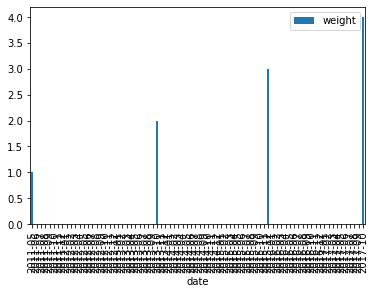

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
          'weight':[1, 2, 3, 4],
          'date':['2011-05-01', '2013-10-10', '2015-12-17', '2017-10-29']
          })
df['date'] = pd.to_datetime(df['date'])

df1 = df.groupby(df['date'].dt.to_period('M')).sum()

df1 = df1.resample('M').asfreq().fillna(0)
df1 = df1.reset_index()
plt.figure();

df1.plot(x='date', y='weight', kind='bar')

In [15]:
d="""dt,tick
08:04:29,441.95
08:04:29,441.95
08:04:29,441.95"""
df=g(d)
df

,dt,tick
0,08:04:29,441.95
1,08:04:29,441.95
2,08:04:29,441.95


In [16]:
df = df.set_index('dt')
df.index = pd.to_datetime(df.index)
df

,tick
dt,
2021-06-07 08:04:29,441.95
2021-06-07 08:04:29,441.95
2021-06-07 08:04:29,441.95


In [17]:
df = pd.DataFrame({
    'Timestamp':pd.date_range(start='2021-06-01 00:00:00', periods=6, freq='8h'),
    'values':np.arange(1,7)
})
df

,Timestamp,values
0,2021-06-01 00:00:00,1
1,2021-06-01 08:00:00,2
2,2021-06-01 16:00:00,3
3,2021-06-02 00:00:00,4
4,2021-06-02 08:00:00,5
5,2021-06-02 16:00:00,6


In [18]:
d="""RNo,ID,PID,PDate,Amount
1,AAAAAA,NN11,20210525,100
2,AAAAAA,NN11,20210525,386
1,BBBBBB,A12,20210525,3300
2,BBBBBB,A12,20210525,3300
3,BBBBBB,A12,20210525,3300
1,CCCCCC,B16,20210526,5000
2,CCCCCC,D85,20210526,1000"""
df1=g(d)
df1

,RNo,ID,PID,PDate,Amount
0,1,AAAAAA,NN11,20210525,100
1,2,AAAAAA,NN11,20210525,386
2,1,BBBBBB,A12,20210525,3300
3,2,BBBBBB,A12,20210525,3300
4,3,BBBBBB,A12,20210525,3300
5,1,CCCCCC,B16,20210526,5000
6,2,CCCCCC,D85,20210526,1000


In [19]:
d="""RNo,ID,PID,PDate,Amount
1,AAAAAA,NN11,20210525,386
1,BBBBBB,A12,20210525,3300
2,BBBBBB,A12,20210525,3300
1,CCCCCC,B16,20210526,5000
2,CCCCCC,D85,20210526,1000"""
df2=g(d)
df2

,RNo,ID,PID,PDate,Amount
0,1,AAAAAA,NN11,20210525,386
1,1,BBBBBB,A12,20210525,3300
2,2,BBBBBB,A12,20210525,3300
3,1,CCCCCC,B16,20210526,5000
4,2,CCCCCC,D85,20210526,1000


In [23]:
df_diff = pd.concat([df1, df2])
df_diff = df_diff.sort_values(['RNo',  'ID','PID', 'PDate', 'Amount'])
df_diff_Extract=df_diff.drop_duplicates(keep=False)
df_diff_Extract

,RNo,ID,PID,PDate,Amount
0,1,AAAAAA,NN11,20210525,100
0,1,AAAAAA,NN11,20210525,386
1,2,AAAAAA,NN11,20210525,386
4,3,BBBBBB,A12,20210525,3300


In [27]:
np.random.seed(0)
rng = pd.date_range('2020-01-01', periods=24, freq='T')
df = pd.DataFrame({ 'Date': rng, 'Price': np.random.randn(len(rng)) })
df

,Date,Price
0,2020-01-01 00:00:00,1.764052
1,2020-01-01 00:01:00,0.400157
2,2020-01-01 00:02:00,0.978738
3,2020-01-01 00:03:00,2.240893
4,2020-01-01 00:04:00,1.867558
5,2020-01-01 00:05:00,-0.977278
6,2020-01-01 00:06:00,0.950088
7,2020-01-01 00:07:00,-0.151357
8,2020-01-01 00:08:00,-0.103219
9,2020-01-01 00:09:00,0.410599


In [26]:
df.groupby([pd.Grouper(key='Date', freq='D')]).min() 

,Price
Date,
2020-01-01,-2.55299


In [30]:
n=5
df.groupby([pd.Grouper(key='Date', freq=f'{n}T')]).mean()

,Price
Date,
2020-01-01 00:00:00,1.450280
2020-01-01 00:05:00,0.025767
2020-01-01 00:10:00,0.584979
2020-01-01 00:15:00,0.216313
2020-01-01 00:20:00,-0.444275


In [57]:
pd.Timestamp('2021/01/01').dt.date

AttributeError: 'Timestamp' object has no attribute 'dt'

In [7]:
import pandas as pd
import math
import random
num_of_rows = 10000
data = {
    'x1' : [random.uniform(0.0, 1.0) for x in range(num_of_rows)],
    'x2' : [random.uniform(0.0, 1.0) for x in range(num_of_rows)],
    'x3' : [random.uniform(0.0, 1.0) for x in range(num_of_rows)],
    'term': [random.randint(1, 3) for x in range(num_of_rows)]
}
df = pd.DataFrame(data)
df.head()

,x1,x2,x3,term
0,0.144839,0.062205,0.062845,1
1,0.121163,0.679613,0.943544,1
2,0.567024,0.213242,0.206704,2
3,0.331776,0.465049,0.436311,2
4,0.424214,0.940067,0.760438,1


In [8]:
df['x1'] * (df['term'] >= 1) + df['x2'] * (df['term'] >= 2) + df['x3'] * (df['term'] >= 3)

0       0.144839
1       0.121163
2       0.780266
3       0.796825
4       0.424214
          ...   
9995    1.592816
9996    0.775215
9997    0.464698
9998    1.896662
9999    1.793132
Length: 10000, dtype: float64

In [22]:
d="""ID,PID,PDate,Amount
AAAAAA,NN11,20210525,386
BBBBBB,A12,20210525,3300
BBBBBB,A12,20210525,3300
CCCCCC,B11,20210625,1000"""
df1=g(d)
df1

,ID,PID,PDate,Amount
0,AAAAAA,NN11,20210525,386
1,BBBBBB,A12,20210525,3300
2,BBBBBB,A12,20210525,3300
3,CCCCCC,B11,20210625,1000


In [23]:
d="""ID,PID,PDate,Amount
AAAAAA,NN11,20210525,386"""
df2=g(d)
df2

,ID,PID,PDate,Amount
0,AAAAAA,NN11,20210525,386


In [24]:
df1[~df1.isin(df2).all(1)]

,ID,PID,PDate,Amount
1,BBBBBB,A12,20210525,3300
2,BBBBBB,A12,20210525,3300
3,CCCCCC,B11,20210625,1000


In [25]:
%timeit df1[~df1.isin(df2).all(1)]

2.16 ms ± 382 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
pd.merge(df1, df2, how="outer", indicator=True).query("_merge != 'both'").drop(columns="_merge")

,ID,PID,PDate,Amount
1,BBBBBB,A12,20210525,3300
2,BBBBBB,A12,20210525,3300
3,CCCCCC,B11,20210625,1000


In [35]:
d="""A|B
X1|[3,2,1,5]
X2|[0,-2,1,2]
X3|[5,1,1,-6]"""
df=pd.read_csv(StringIO(d), sep='|')
df

,A,B
0,X1,"[3,2,1,5]"
1,X2,"[0,-2,1,2]"
2,X3,"[5,1,1,-6]"


In [5]:
df = pd.DataFrame({
    'posting_date':pd.date_range('2021-06-01', freq='2D', periods=3),
    'Quantity':np.arange(1,4)
})

df = df.set_index('posting_date')
df

,Quantity
posting_date,
2021-06-01,1
2021-06-03,2
2021-06-05,3


In [7]:
df.asfreq('D', fill_value=0)

,Quantity
posting_date,
2021-06-01,1
2021-06-02,0
2021-06-03,2
2021-06-04,0
2021-06-05,3


In [45]:
d="""col1,col2,col3
A,45,4
A,3,5
B,2,5"""
df=g(d)
df

,col1,col2,col3
0,A,45,4
1,A,3,5
2,B,2,5


In [46]:
df2 = df.loc[df.col1 == 'A']
df2


,col1,col2,col3
0,A,45,4
1,A,3,5


In [54]:
d = """Period,Total
January 2000,49045412
February 2000,49306303
March 2000,60443541
April 2000,58286680
May 2000,60533783
June 2000,64903295
July 2000,67346377
August 2000,66256804
September 2000,55900504
October 2000,58373996
November 2000,55590325
December 2000,54822970"""
df=g(d)
df

,Period,Total
0,January 2000,49045412
1,February 2000,49306303
2,March 2000,60443541
3,April 2000,58286680
4,May 2000,60533783
5,June 2000,64903295
6,July 2000,67346377
7,August 2000,66256804
8,September 2000,55900504
9,October 2000,58373996


In [55]:
df['Month'] = pd.to_datetime(df.Period, format='%B %Y')

In [56]:
pd.to_datetime(df['Period'])

0    2000-01-01
1    2000-02-01
2    2000-03-01
3    2000-04-01
4    2000-05-01
5    2000-06-01
6    2000-07-01
7    2000-08-01
8    2000-09-01
9    2000-10-01
10   2000-11-01
11   2000-12-01
Name: Period, dtype: datetime64[ns]

In [41]:
df['Month1'] = pd.DatetimeIndex(df.Period)

In [33]:
df

,Period,Total,Month1
0,January 2000,49045412,2000-01-01
1,February 2000,49306303,2000-02-01
2,March 2000,60443541,2000-03-01
3,April 2000,58286680,2000-04-01
4,May 2000,60533783,2000-05-01
5,June 2000,64903295,2000-06-01
6,July 2000,67346377,2000-07-01
7,August 2000,66256804,2000-08-01
8,September 2000,55900504,2000-09-01
9,October 2000,58373996,2000-10-01


In [47]:
d="""name,day1,day2,day3,day4
jakki,10,20,20,50
rohan,4,10,30,20
sona,10,30,40,40"""
df1=g(d)
df1

,name,day1,day2,day3,day4
0,jakki,10,20,20,50
1,rohan,4,10,30,20
2,sona,10,30,40,40


In [48]:
d="""name,day1,day2,day3,day4
top,2,10,5,10"""
df2=g(d)
df2

,name,day1,day2,day3,day4
0,top,2,10,5,10


In [52]:
df1.iloc[:, 1:] = df1.iloc[:, 1:] / df2.iloc[:, 1:].values

In [53]:
df1

,name,day1,day2,day3,day4
0,jakki,5.0,2.0,4.0,5.0
1,rohan,2.0,1.0,6.0,2.0
2,sona,5.0,3.0,8.0,4.0


In [57]:
d="""index,shift,value
0,1,A
1,0,nan
2,0,A
3,1,A
4,0,nan
5,0,nan
6,0,A
7,0,nan"""
df=g(d)
df

,index,shift,value
0,0,1,A
1,1,0,NaN
2,2,0,A
3,3,1,A
4,4,0,NaN
5,5,0,NaN
6,6,0,A
7,7,0,NaN


In [62]:
np.where(df.shift == 1,df.value.shift(),df.shift)

array([<bound method DataFrame.shift of    index  shift value
0      0      1     A
1      1      0   NaN
2      2      0     A
3      3      1     A
4      4      0   NaN
5      5      0   NaN
6      6      0     A
7      7      0   NaN>,
       <bound method DataFrame.shift of    index  shift value
0      0      1     A
1      1      0   NaN
2      2      0     A
3      3      1     A
4      4      0   NaN
5      5      0   NaN
6      6      0     A
7      7      0   NaN>,
       <bound method DataFrame.shift of    index  shift value
0      0      1     A
1      1      0   NaN
2      2      0     A
3      3      1     A
4      4      0   NaN
5      5      0   NaN
6      6      0     A
7      7      0   NaN>,
       <bound method DataFrame.shift of    index  shift value
0      0      1     A
1      1      0   NaN
2      2      0     A
3      3      1     A
4      4      0   NaN
5      5      0   NaN
6      6      0     A
7      7      0   NaN>,
       <bound method DataFrame.shift of 

In [15]:
d="""date,train,condition 1,condition 2
day1,1111,true,0
day2,2222,false,2"""
df=g(d)
df

,date,train,condition 1,condition 2
0,day1,1111,True,0
1,day2,2222,False,2


In [11]:
grouped = df.groupby('date')
df['train total count'] = df.groupby('date')['train'].transform('count')
df

,date,train,condition 1,condition 2,train total count
0,day1,1111,True,0,1
1,day2,2222,False,2,1


In [10]:
grouped.train.transform('count')

0    1
1    1
Name: train, dtype: int64

In [16]:
df.groupby('date').transform(lambda x:x.gt(0))

,train,condition 1,condition 2
0,True,True,False
1,True,False,True


In [18]:
df = pd.DataFrame({
    'A':range(1,7),
    'B':range(4,10),
    'C':range(7,13)
})
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10
4,5,8,11
5,6,9,12


In [21]:
set(df.A).intersection(df.B)

{4, 5, 6}

In [23]:
d="""Election Year,Votes,Vote %,Party,Region
2000,42289,29.40,Janata Dal (United),A
2000,27618,19.20,Rashtriya Janata Dal,A
2000,20886,14.50,Bahujan Samaj Party,B 
2000,17747,12.40,Congress,B
2000,14047,19.80,Independent,C
2000,17047,10.80,JLS,C
2005,8358,15.80,Janvadi Party,A
2005,4428,13.10,Independent,A
2005,1647,1.20,Independent,B
2005,1610,11.10,Independent,B
2005,1334,15.06,Nationalist,C
2005,1834,18.06,NJM,C
2010,21114,20.80,Independent,A
2010,1042,10.5,Bharatiya Janta Dal,A
2010,835,0.60,Independent,B
2010,14305,15.50,Independent,B
2010,22211,17.70,Congress,C
2010,20011,14.70,INC,C"""
df=g(d)
df

,Election Year,Votes,Vote %,Party,Region
0,2000,42289,29.40,Janata Dal (United),A
1,2000,27618,19.20,Rashtriya Janata Dal,A
2,2000,20886,14.50,Bahujan Samaj Party,B
3,2000,17747,12.40,Congress,B
4,2000,14047,19.80,Independent,C
5,2000,17047,10.80,JLS,C
6,2005,8358,15.80,Janvadi Party,A
7,2005,4428,13.10,Independent,A
8,2005,1647,1.20,Independent,B
9,2005,1610,11.10,Independent,B


In [24]:
df = pd.DataFrame({
    'ID': range(1, 4),
    'col1': [10, 5, 10],
    'col2': [15, 10, 15],
    'col3': [10, 15, 15],
    'total': [35, 30, 40]
})
df

,ID,col1,col2,col3,total
0,1,10,15,10,35
1,2,5,10,15,30
2,3,10,15,15,40


In [31]:
df = df.set_index('ID')

In [43]:
df / df.total.values

ValueError: Unable to coerce to Series, length must be 4: given 3

In [42]:
df.total.values

array([35, 30, 40])

In [5]:
columns = ['A_0','A_1','A_2','A_3','B_0','B_1','B_2', 'B_3']

In [21]:
base_mon = 'Oct20'
pd.to_datetime(base_mon, format='%b%y') - pd.offsets.MonthBegin

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'type'

In [20]:
base_mon = 'Oct20'
for i in range(4):
    curr_mon = pd.to_datetime(base_mon, format='%b%y') - pd.Timedelta(months=i)
    curr_mon_str2 = curr_mon.strftime('%b%y').upper()
    
    columns = columns.str.replace(str(i), curr_mon_str2)

ValueError: cannot construct a Timedelta from the passed arguments, allowed keywords are [weeks, days, hours, minutes, seconds, milliseconds, microseconds, nanoseconds]

<AxesSubplot:>

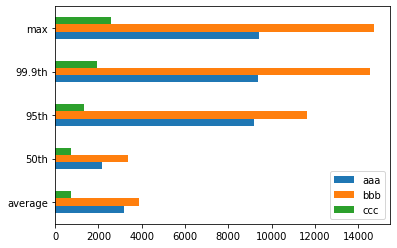

In [22]:
index = ['average', '50th', '95th', '99.9th', 'max']
aaa = [3180, 2153, 9172, 9368, 9432]
bbb = [3857, 3367, 11638, 14555, 14731]
ccc = [740, 716, 1326, 1927, 2591]

df = pd.DataFrame({'aaa': aaa, 'bbb': bbb, 'ccc': ccc}, index=index)
df.plot.barh()

In [23]:
data = {'Election Year':['2000', '2000','2000','2000','2000','2000','2000','2000','2000','2005','2005','2005','2005','2005','2005','2005','2005','2005', '2010', '2010','2010','2010','2010','2010','2010','2010', '2010'],
    'Votes':[30, 50, 20, 26, 30, 45, 20, 46, 80, 60, 46, 95, 60, 10, 95, 16, 65, 35, 50, 100, 70, 26, 180, 100, 120, 46, 80], 
    'Party': ['A', 'B', 'C', 'A', 'B', 'C','A', 'B', 'C','A', 'B', 'C','A', 'B', 'C','A', 'B', 'C', 'A', 'B', 'C','A', 'B', 'C','A', 'B', 'C'],
    'Region': ['a', 'a', 'a', 'b', 'b', 'b','c', 'c', 'c','a', 'a', 'a', 'b', 'b', 'b','c', 'c', 'c','a', 'a', 'a', 'b', 'b', 'b','c', 'c', 'c']}
df = pd.DataFrame(data)
df

,Election Year,Votes,Party,Region
0,2000,30,A,a
1,2000,50,B,a
2,2000,20,C,a
3,2000,26,A,b
4,2000,30,B,b
5,2000,45,C,b
6,2000,20,A,c
7,2000,46,B,c
8,2000,80,C,c
9,2005,60,A,a


In [25]:
df1 = df.groupby(['Election Year','Party'])['Votes'].sum().reset_index()
df1 = df1.sort_values(['Election Year','Votes'], ascending=False)
top_2 = df1.groupby('Election Year').head(8).reset_index()
top_2 = top_2[['Election Year', 'Party']]
top_2

,Election Year,Party
0,2010,B
1,2010,C
2,2010,A
3,2005,C
4,2005,A
5,2005,B
6,2000,C
7,2000,B
8,2000,A


In [28]:
df = pd.DataFrame({
    'date':pd.date_range(start='2021-06-01', periods=5)
})
df

,date
0,2021-06-01
1,2021-06-02
2,2021-06-03
3,2021-06-04
4,2021-06-05


In [35]:
# 
# df.date = pd.to_datetime(df.date) -- IF date column is not of timestamp type
df['mergeDate']= df.date + pd.Timedelta('1D')
df

,date,mergeDate
0,2021-06-01,2021-06-02
1,2021-06-02,2021-06-03
2,2021-06-03,2021-06-04
3,2021-06-04,2021-06-05
4,2021-06-05,2021-06-06


In [36]:
d="""ID,Goal,Reported,Score
1,0,1,2
2,2,3,1
3,8,2,9"""
df=g(d)
df

,ID,Goal,Reported,Score
0,1,0,1,2
1,2,2,3,1
2,3,8,2,9


In [38]:
df.Score = np.where(df['Reported'] >= df['Goal'],0, df['Score'] )

In [39]:
df

,ID,Goal,Reported,Score
0,1,0,1,0
1,2,2,3,0
2,3,8,2,9


In [2]:
q = pd.DataFrame({'ID':[700,701,701,702,703,703,702],'TX':[0,0,1,0,0,1,1],'REF':[100,120,144,100,103,105,106]})
q

,ID,TX,REF
0,700,0,100
1,701,0,120
2,701,1,144
3,702,0,100
4,703,0,103
5,703,1,105
6,702,1,106


In [3]:
p  = pd.DataFrame({'ID':[700,701,701,702,703,703,702,708],'REF':[100,121,149,100,108,105,106,109],'NOTE':['A','B','V','V','T','A','L','M']})
p

,ID,REF,NOTE
0,700,100,A
1,701,121,B
2,701,149,V
3,702,100,V
4,703,108,T
5,703,105,A
6,702,106,L
7,708,109,M


In [5]:
p = p.sort_values(by=['REF'])
q = q.sort_values(by=['REF'])
pd.merge_asof(p, q, on=['ID','REF'], direction='forward').sort_values(by=['ID_x','TX'])


MergeError: can only asof on a key for left

In [6]:
class PTest:
    def __init__(self, te):
        self.te = te
        print(self.te)

class Test(PTest):
    def __init__(self, te):
        print('Test 1')
        super().__init__(te)
    
Test('Ramesh', "Suresh")

TypeError: __init__() takes 2 positional arguments but 3 were given

In [9]:
from datetime import time, date
date.timestamp(time(13,20))

AttributeError: type object 'datetime.date' has no attribute 'timestamp'

In [17]:
from typing import Union, List
class qD:
    def __init__(self, value:Union[datetime.datetime, 
                 str, List[datetime.datetime], List[str]]):
        print(value)

qD(datetime.time(13,30))

13:30:00


In [2]:
df = pd.DataFrame({
                      'user_id': [1,2,3,4,5,6],
                      'created_at': [
                              '2017-01-01 10:10:15',
                              '2017-01-01 11:11:11',
                              '2017-01-01 12:12:12',
                              '2017-01-01 10:10:20',
                              '2017-01-01 10:10:34',
                              '2017-01-01 11:11:21'],
                      'transaction_value': [10, 20, 10, 30, 40, 50]
                      })

# convert string to datetime obj
df['created_at'] = pd.to_datetime(df['created_at'])


# convert other columns to numeric
cols = df.columns.drop('created_at')

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# creating lag1 and lag2
df['lag1'] = (
        df.sort_values(by=['created_at'], ascending=True)['created_at']
        .shift(periods=1, axis=0).fillna(0)
        )

df['lag2'] = (
        df.sort_values(by=['created_at'], ascending=True)['created_at']
        .shift(periods=-1, axis=0).fillna(0)
        )

# 0's to NaN
df = df.replace(0, np.nan, inplace=False)

# convert to datetime
cols = [col for col in df if col.startswith('lag')]

df[cols] = df[cols].apply(pd.to_datetime, errors='coerce')

In [3]:
df

,user_id,created_at,transaction_value,lag1,lag2
0,1,2017-01-01 10:10:15,10,NaT,2017-01-01 10:10:20
1,2,2017-01-01 11:11:11,20,2017-01-01 10:10:34,2017-01-01 11:11:21
2,3,2017-01-01 12:12:12,10,2017-01-01 11:11:21,NaT
3,4,2017-01-01 10:10:20,30,2017-01-01 10:10:15,2017-01-01 10:10:34
4,5,2017-01-01 10:10:34,40,2017-01-01 10:10:20,2017-01-01 11:11:11
5,6,2017-01-01 11:11:21,50,2017-01-01 11:11:11,2017-01-01 12:12:12


In [21]:
df['lag_diff'] = pd.to_timedelta(df.lag1 - df.lag2, unit='s').dt.total_seconds()

In [23]:
df[['lag1', 'lag2', 'lag_diff']]

,lag1,lag2,lag_diff
0,NaT,2017-01-01 10:10:20,NaN
1,2017-01-01 10:10:34,2017-01-01 11:11:21,-3647.0
2,2017-01-01 11:11:21,NaT,NaN
3,2017-01-01 10:10:15,2017-01-01 10:10:34,-19.0
4,2017-01-01 10:10:20,2017-01-01 11:11:11,-3651.0
5,2017-01-01 11:11:11,2017-01-01 12:12:12,-3661.0


In [55]:
d="""name,date
aaa,12/06/2021
bbb,11/06/2021
ccc,10/06/2021
zzz,15/06/2021
ddd,13/06/2021
eee,10/05/2021
fff,01/06/2021
ggg,10/05/2021
hhh,13/06/2021
iii,14/06/2021
nnn,15/06/2021
jjj,15/06/2021"""
df=g(d)
df

,name,date
0,aaa,12/06/2021
1,bbb,11/06/2021
2,ccc,10/06/2021
3,zzz,15/06/2021
4,ddd,13/06/2021
5,eee,10/05/2021
6,fff,01/06/2021
7,ggg,10/05/2021
8,hhh,13/06/2021
9,iii,14/06/2021


In [54]:
df.date = pd.to_datetime(df.date, dayfirst=True)
df = df.set_index('date')
df = df[df.index.dayofweek < 5].reset_index()
df

,date,name
0,2021-06-11,bbb
1,2021-06-10,ccc
2,2021-06-15,zzz
3,2021-05-10,eee
4,2021-06-01,fff
5,2021-05-10,ggg
6,2021-06-14,iii
7,2021-06-15,nnn
8,2021-06-15,jjj


In [56]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

new_date = pd.to_datetime('today') - pd.offsets.BDay(2)
new_df = df[df['date'] < new_date]
new_df

,name,date
1,bbb,2021-06-11
2,ccc,2021-06-10
5,eee,2021-05-10
6,fff,2021-06-01
7,ggg,2021-05-10


,name
date,
2021-12-06,aaa
2021-10-06,ccc
2021-06-15,zzz
2021-10-05,eee
2021-01-06,fff
2021-10-05,ggg
2021-06-14,iii
2021-06-15,nnn
2021-06-15,jjj


In [2]:
d="""ID,DEPTH,VARIABLE
111,3,x
111,4,x
111,1,x
111,2,x
222,1,x
222,4,x
222,2,x
222,3,x"""
df=g(d)
df

,ID,DEPTH,VARIABLE
0,111,3,x
1,111,4,x
2,111,1,x
3,111,2,x
4,222,1,x
5,222,4,x
6,222,2,x
7,222,3,x


In [16]:
df = df.sort_values(['ID', 'DEPTH'])

In [17]:
df

,ID,DEPTH,VARIABLE
2,111,1,x
3,111,2,x
0,111,3,x
1,111,4,x
4,222,1,x
6,222,2,x
7,222,3,x
5,222,4,x


In [20]:
d="""User ID,Date,Medium
1,2018-08-02 16:43:00,Instagram
1,2018-09-18 15:23:00,Chat
1,2019-10-09 08:37:00,Chat
2,2019-09-27 14:47:05,Chat
3,2019-01-05 16:43:00,Facebook
3,2019-06-15 16:43:00,Chat
3,2020-02-17 16:43:00,Web
3,2020-07-14 16:43:00,Chat"""
df=g(d)
df

,User ID,Date,Medium
0,1,2018-08-02 16:43:00,Instagram
1,1,2018-09-18 15:23:00,Chat
2,1,2019-10-09 08:37:00,Chat
3,2,2019-09-27 14:47:05,Chat
4,3,2019-01-05 16:43:00,Facebook
5,3,2019-06-15 16:43:00,Chat
6,3,2020-02-17 16:43:00,Web
7,3,2020-07-14 16:43:00,Chat


In [28]:
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by='Date') # incase data is not sorted by Date
gb_Medium = df.groupby(['User ID']).Medium
gb_Medium.apply(list).

User ID
1        [Instagram, Chat, Chat]
2                         [Chat]
3    [Facebook, Chat, Web, Chat]
Name: Medium, dtype: object

In [29]:
df1999 = pd.DataFrame({
    'H31C':range(1,5),
    'H31B':range(10,41,10),
})

df1999

,H31C,H31B
0,1,10
1,2,20
2,3,30
3,4,40


In [30]:
df1999['H31C'] = df1999['H31B']

In [31]:
df1999

,H31C,H31B
0,10,10
1,20,20
2,30,30
3,40,40


In [32]:
d="""Date/Time,Number
09:30:38.6324497,3356
09:30:39.694597,4456
09:30:40.6714597,5546
09:30:41.6843299,634
09:30:42.69123437,22"""
d2 = g(d)
d2

,Date/Time,Number
0,09:30:38.6324497,3356
1,09:30:39.694597,4456
2,09:30:40.6714597,5546
3,09:30:41.6843299,634
4,09:30:42.69123437,22


In [33]:
df = pd.DataFrame({
    'fund':range(4),
    'period.':np.random.rand(4),
    'fund.':np.random.randn(4)
})

df

,fund,period.,fund.
0,0,0.784976,0.894867
1,1,0.408408,1.902658
2,2,0.548690,-1.674395
3,3,0.651738,1.155236


In [36]:
df.columns.str.rstrip('.')

Index(['fund', 'period', 'fund'], dtype='object')

In [4]:
'ABC '.join('abc')

'aABC bABC c'

In [5]:
raw_data = {'date' : pd.to_datetime(pd.Series(['2017-04-01','2017-04-02','2017-04-03','2017-04-04','2017-04-05','2017-04-06','2017-04-07','2017-04-08','2017-04-09','2017-04-10'])),
        'name1': [1,1,1,0,0,0,1,1,1,1],'name2': [0,0,0,1,1,1,1,0,0,1]}
df = pd.DataFrame(raw_data, columns = ['date','name1','name2'])
df

,date,name1,name2
0,2017-04-01,1,0
1,2017-04-02,1,0
2,2017-04-03,1,0
3,2017-04-04,0,1
4,2017-04-05,0,1
5,2017-04-06,0,1
6,2017-04-07,1,1
7,2017-04-08,1,0
8,2017-04-09,1,0
9,2017-04-10,1,1


In [6]:
#Initialize an empty dictionary: pattern_count
pattern_count = {}

# Extract column from DataFrame: col
col = df['name1']

# Iterate over column in dataframe
for entry in col:

    # count consecutive 1 values in a row, add 1
    if entry in pattern_count.keys():
        pattern_count[entry] += 1
 
    else:
        pattern_count[entry] = 1

# Print the populated dictionary
print(pattern_count)

{1: 7, 0: 3}


In [3]:
df = pd.DataFrame({
    'a':[10,20,],
    'b':[30,40]
})
df.T

,0,1
a,10,20
b,30,40


In [4]:
import datetime
datetime.date.today().strftime('%Y%m%d')

'20210627'